#Business Understanding

💼 Business Context

Uber Inc., sebagai salah satu perusahaan transportasi berbasis aplikasi terbesar di dunia, melayani jutaan pelanggan setiap harinya. Dengan skala operasional yang sangat besar, pengelolaan dan pemanfaatan data perjalanan menjadi hal yang krusial untuk menunjang efisiensi dan pengambilan keputusan bisnis yang lebih baik. Salah satu komponen utama dalam layanan Uber adalah fare amount atau tarif perjalanan, yang sangat dipengaruhi oleh berbagai faktor seperti jarak, waktu, dan jumlah penumpang.

🎯 Business Problem

Variasi harga tarif perjalanan yang tidak konsisten atau tidak akurat dapat berdampak langsung terhadap kepuasan pelanggan, persepsi keadilan harga, dan bahkan strategi pemasaran serta penetapan harga dinamis Uber. Oleh karena itu, perusahaan membutuhkan model prediktif yang dapat memperkirakan tarif secara akurat sebelum perjalanan dilakukan, berdasarkan informasi yang tersedia saat pemesanan.

🧭 Project Goals

1. Memprediksi Tarif Perjalanan Uber (fare_amount): <br>
    Menggunakan data historis perjalanan Uber untuk membangun model prediktif berbasis regresi yang mampu memperkirakan tarif perjalanan secara akurat.

2. Mengidentifikasi Faktor-Faktor Penting yang Mempengaruhi Tarif: <br>
    Memahami hubungan antara lokasi penjemputan, lokasi penurunan, jumlah penumpang, serta waktu perjalanan terhadap besarnya tarif.

3. Meningkatkan Efisiensi dan Keputusan Bisnis:<br>
    Model prediksi tarif ini dapat digunakan untuk meningkatkan transparansi harga, pengambilan keputusan berbasis data, dan mendukung inisiatif lain seperti fare recommendation, fraud detection, dan customer segmentation.

🧪 Analytical Approach

1. Melakukan pembersihan dan eksplorasi data untuk memahami pola umum dan outlier.

2. Membangun beberapa model regresi (seperti Linear Regression, Decision Tree, Random Forest, dan Gradient Boosting) untuk memperkirakan fare_amount.

3. Mengevaluasi model menggunakan metrik performa seperti R², RMSE, dan MAE untuk membandingkan akurasi dan efisiensi model.

🧾 Deliverables

    Model prediksi tarif perjalanan Uber.

    Analisis fitur yang berpengaruh terhadap tarif.

    Evaluasi dan perbandingan performa model.

    Insight dan rekomendasi bisnis berbasis hasil model.

# Data Understanding & EDA Awal

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
#Membaca file CSV
df = pd.read_csv(r'C:\Users\thesa\Documents\Sertifikasi\uber.csv')

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


1.  Kolom `pickup_datetime` menyimpan informasi tersembunyi yang sangat berguna. Ketika dipecah (extract) waktu menjadi fitur-fitur seperti:

  * hour
  * day
  * month
  * years
  
  maka kita bisa membantu model mempelajari pola tarif berdasarkan waktu.

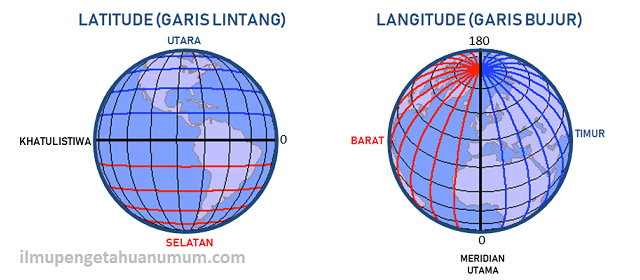

In [5]:
#Mengecek berapa baris dan kolom dataset
df.shape

(200000, 9)

In [6]:
#Menghapus kolum yang tidak relevan / tidak dibutuhkan
df = df.drop(['Unnamed: 0' , 'key'], axis = 1)

Alasan Menghapus Kolom `Unnamed: 0` dan `key`

- `Unnamed: 0`:
  - Hanya index lama dari Pandas yang ikut tersimpan saat export ke CSV.
  - Isinya cuma nomor urut baris, nggak punya arti atau pola yang bisa dipakai model.
  - Nggak membantu untuk analisis atau prediksi, jadi lebih baik dihapus.

- `key`:
  - Isinya timestamp waktu penjemputan (pickup time), tapi formatnya kurang rapi.
  - Data yang sama sudah ada di kolom `pickup_datetime` dengan format yang lebih jelas.
  - Menyimpan dua kolom yang isinya mirip bisa bikin data jadi redundan (dobel).
  - Supaya nggak membingungkan model, kolom ini juga dihapus.

Intinya, kedua kolom ini nggak punya nilai tambah buat proses analisis atau machine learning, jadi lebih baik dibuang supaya data lebih bersih dan fokus.


In [7]:
#Mengecek tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
#Mengecek missing value / NaN Value
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
#untuk melihat ringkasan statistik awal dari kolom-kolom numerik dalam DataFrame
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
#Mengkstrak tanggal dan waktu dari kolom pickup_datetime (YYYY-MM-DD)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

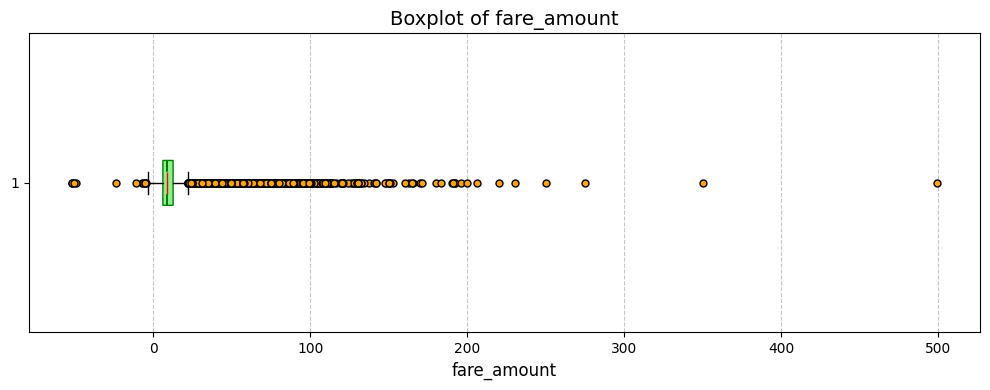

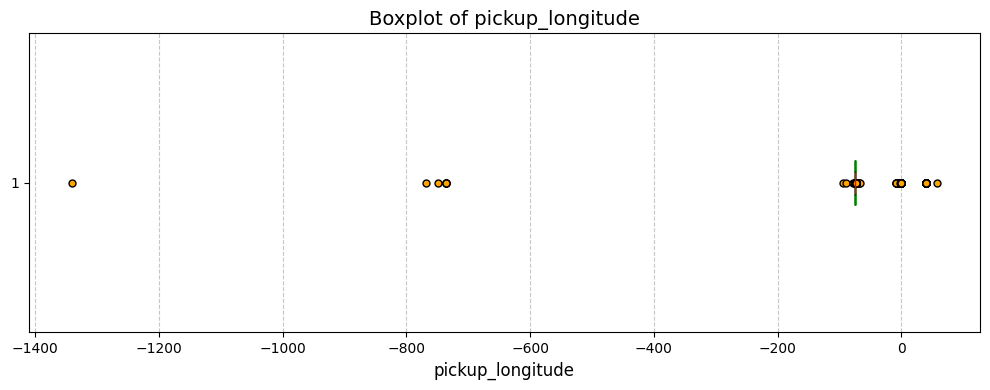

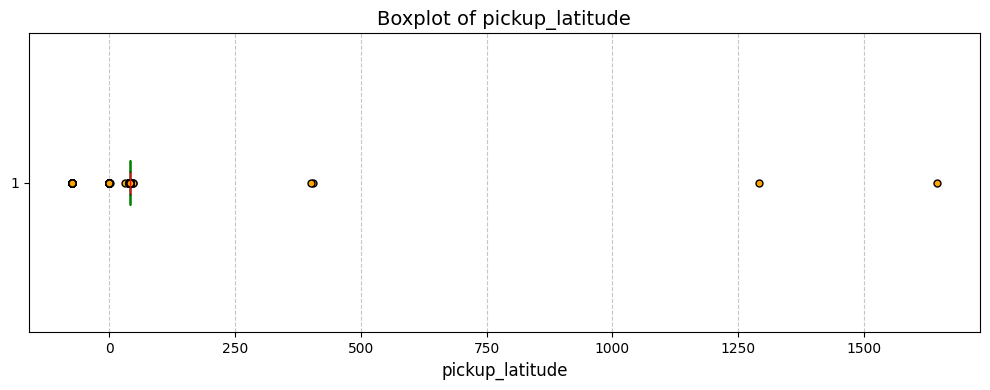

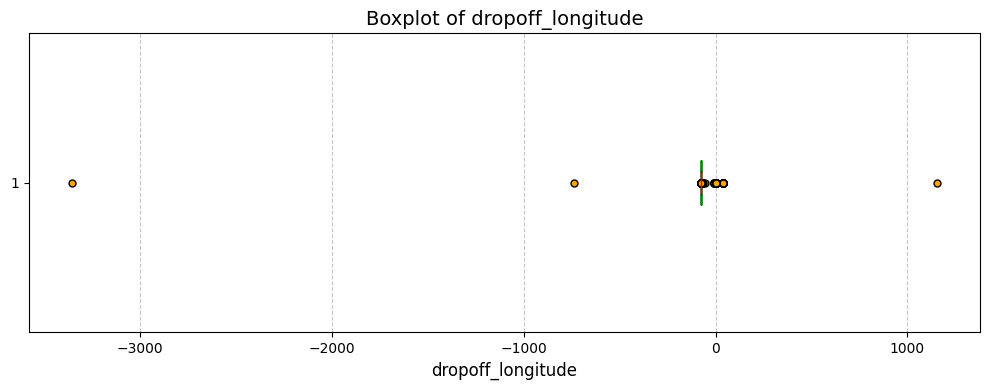

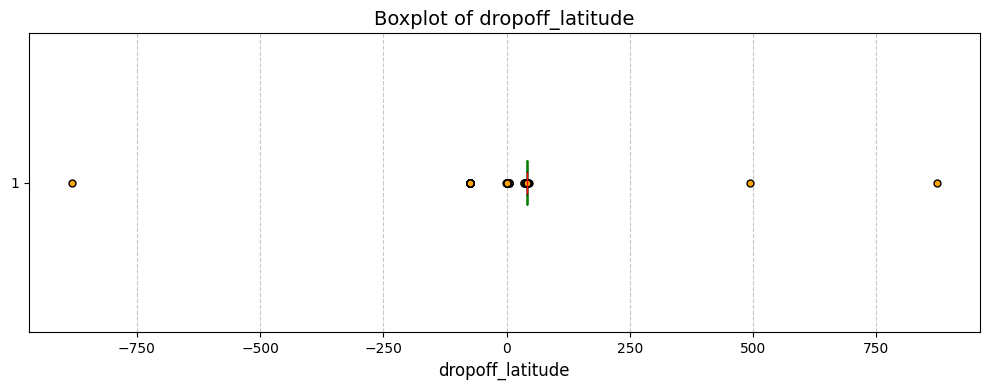

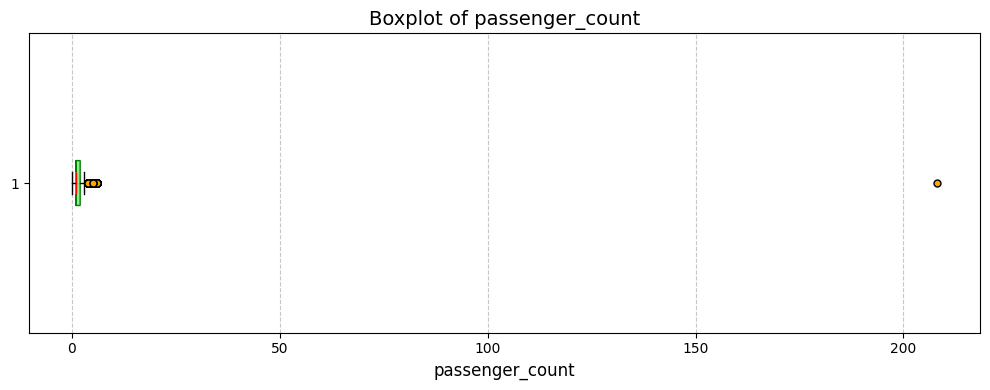

In [11]:
import matplotlib.pyplot as plt

# Pilih kolom numerik
num_col = df.select_dtypes(include=['int64', 'float64'])

# Boxplot horizontal untuk setiap kolom numerik
for col in num_col.columns:
    plt.figure(figsize=(10, 4))  # Lebar diperbesar untuk horizontal
    plt.boxplot(df[col].dropna(),
                vert=False,                  # Horizontal
                patch_artist=True,
                notch=True,
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid horizontal (karena orientasi horizontal)
    plt.tight_layout()
    plt.show()


In [12]:
#duplicate values

df.duplicated().value_counts()

False    200000
Name: count, dtype: int64

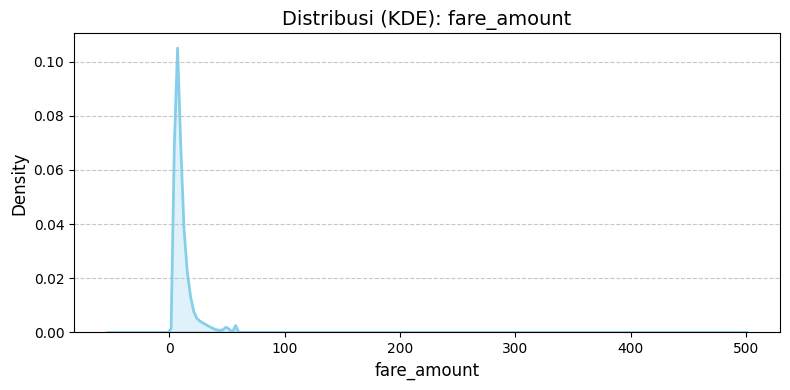

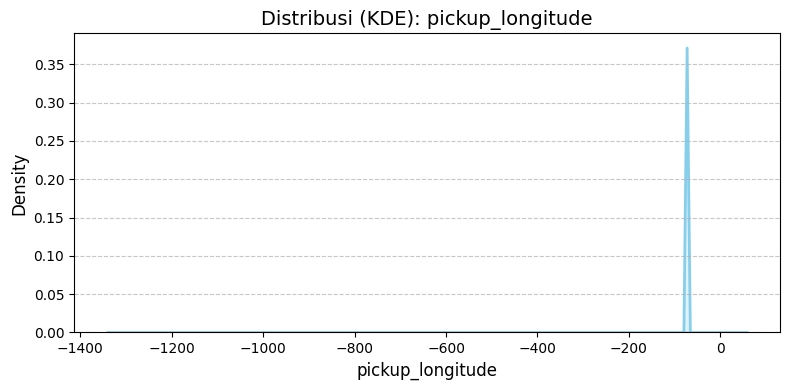

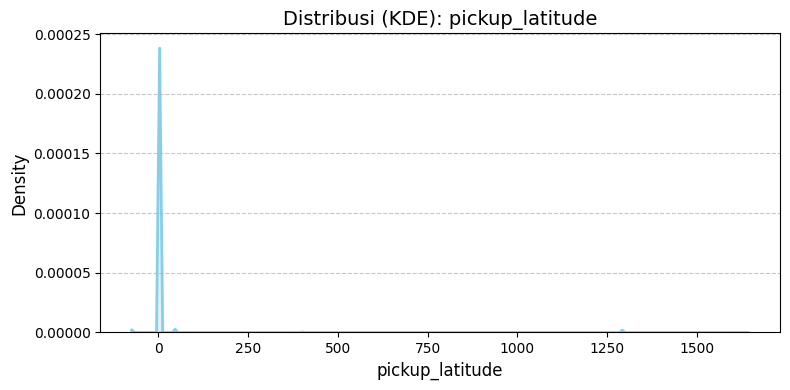

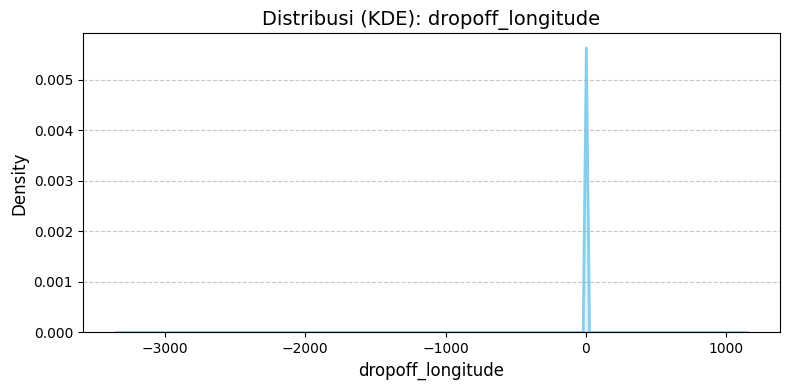

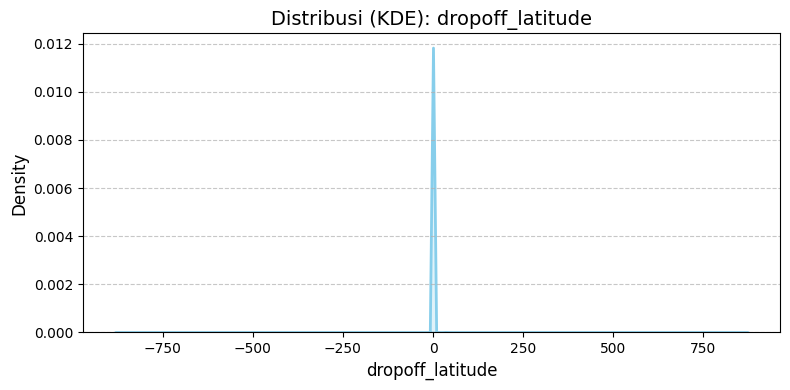

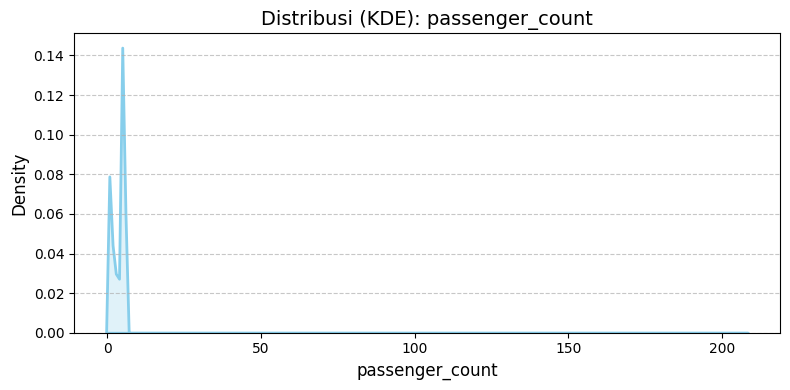

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot KDE (density) per kolom numerik
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col].dropna(), fill=True, color='skyblue', linewidth=2)
    plt.title(f'Distribusi (KDE): {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [14]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

# Data Preparation & Eda Akhir

###Membagi berdasarkan tahun, bulan, hari, dan jam

In [15]:
#Membuat kolom tahun,bulan,hari dan jam dari pickup_datetime
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [16]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14


###Musim berdasarkan bulan
model dapat mempelajari dampak unik dari setiap musim terhadap tarif, yang mungkin tidak dapat ditangkap hanya dengan fitur tanggal atau bulan saja secara linier.

In [17]:
#Extract Fitur Bulan Dijadikan Musim
def get_season(mnth):
  if mnth in [12,1,2]:
    return 'winter'
  elif mnth in [3,4,5]:
    return 'spring'
  elif mnth in [6,7,8]:
    return 'summer'
  elif mnth in [9,10,11]:
    return 'fall'

df['pickup_season'] = df['pickup_month'].apply(get_season)
season_map = {'winter': 0, 'spring': 1, 'summer': 2, 'fall': 3}
df['season_code'] = df['pickup_season'].map(season_map)

In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1


###Kategori Jam
Kategori Waktu dalam Sehari: Kelompokkan jam ke dalam "jam sibuk" (rush hour), "di luar jam sibuk" (off-peak), "malam" untuk menangkap pola non-linear.

Tujuan dari pengelompokan jam ke dalam kategori waktu dalam sehari adalah untuk menangkap perbedaan perilaku pengguna dan kondisi lalu lintas yang signifikan pada segmen waktu tertentu.

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\3509392968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


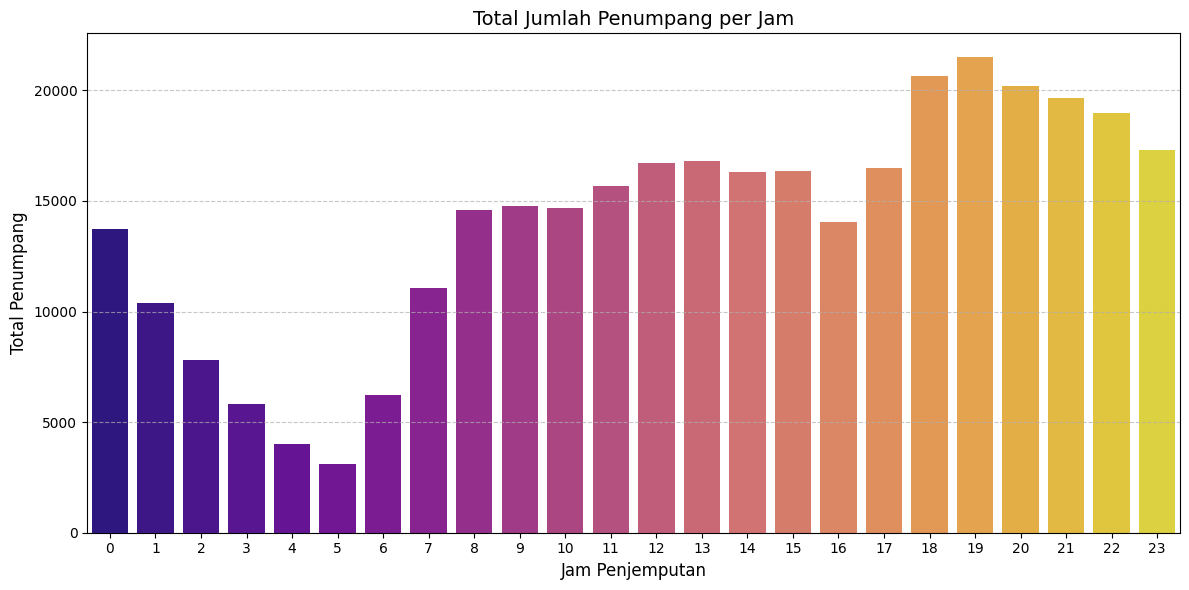

In [19]:
# Visualisasi jumlah penumpang per jam
plt.figure(figsize=(12, 6))
passenger_by_hour = df.groupby('pickup_hour')['passenger_count'].sum().reset_index()
sns.barplot(
    data=passenger_by_hour,
    x='pickup_hour',
    y='passenger_count',
    palette='plasma'
)
plt.title('Total Jumlah Penumpang per Jam', fontsize=14)
plt.xlabel('Jam Penjemputan', fontsize=12)
plt.ylabel('Total Penumpang', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
#Extract Fitur Waktu Dijadikan Rush Hour
def hour_category(hour):
    if 12 <= hour <= 13 or 18 <= hour <= 20:
        return 'rush_hour'
    elif 0 <= hour <= 5:
        return 'night'
    else:
        return 'off_peak'

In [21]:
df['pickup_hour_category'] = df['pickup_hour'].apply(hour_category)

In [22]:
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [23]:
#Menghapus Fare Amount Negatif, tidak mungkin jika negatif
df = df.drop(df[df['fare_amount'] < 0].index)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199983 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           199983 non-null  float64            
 1   pickup_datetime       199983 non-null  datetime64[ns, UTC]
 2   pickup_longitude      199983 non-null  float64            
 3   pickup_latitude       199983 non-null  float64            
 4   dropoff_longitude     199982 non-null  float64            
 5   dropoff_latitude      199982 non-null  float64            
 6   passenger_count       199983 non-null  int64              
 7   pickup_year           199983 non-null  int32              
 8   pickup_month          199983 non-null  int32              
 9   pickup_weekday        199983 non-null  int32              
 10  pickup_hour           199983 non-null  int32              
 11  pickup_season         199983 non-null  object            

###Memvalidasi koordinat

In [25]:
#Menyaring koordinat tidak valid:
#Baris dengan nilai latitude di luar -90 sampai 90 atau longitude di luar -180
#sampai 180 dihapus karena tidak sesuai dengan batas koordinat

#Filter lokasi: hanya wilayah NYC
df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['dropoff_longitude'].between(-180, 180)) &
    (df['pickup_latitude'] != 0) &
    (df['pickup_longitude'] != 0) &
    (df['dropoff_latitude'] != 0) &
    (df['dropoff_longitude'] != 0)
]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196003 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           196003 non-null  float64            
 1   pickup_datetime       196003 non-null  datetime64[ns, UTC]
 2   pickup_longitude      196003 non-null  float64            
 3   pickup_latitude       196003 non-null  float64            
 4   dropoff_longitude     196003 non-null  float64            
 5   dropoff_latitude      196003 non-null  float64            
 6   passenger_count       196003 non-null  int64              
 7   pickup_year           196003 non-null  int32              
 8   pickup_month          196003 non-null  int32              
 9   pickup_weekday        196003 non-null  int32              
 10  pickup_hour           196003 non-null  int32              
 11  pickup_season         196003 non-null  object            

In [27]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [28]:
#Tidak mungkin tidak membawa penumpang dan melebihi 6
df = df.drop(df[(df['passenger_count'] > 6) | (df['passenger_count'] < 1)].index)

In [29]:
print(df['passenger_count'].value_counts())

passenger_count
1    135626
2     28863
5     13738
3      8705
6      4202
4      4182
Name: count, dtype: int64


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195316 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           195316 non-null  float64            
 1   pickup_datetime       195316 non-null  datetime64[ns, UTC]
 2   pickup_longitude      195316 non-null  float64            
 3   pickup_latitude       195316 non-null  float64            
 4   dropoff_longitude     195316 non-null  float64            
 5   dropoff_latitude      195316 non-null  float64            
 6   passenger_count       195316 non-null  int64              
 7   pickup_year           195316 non-null  int32              
 8   pickup_month          195316 non-null  int32              
 9   pickup_weekday        195316 non-null  int32              
 10  pickup_hour           195316 non-null  int32              
 11  pickup_season         195316 non-null  object            

###  Menghitung Jarak (Rumus Haversine)

Untuk menghitung jarak antara dua titik di permukaan bumi, digunakan **Rumus Haversine** yang memperhitungkan kelengkungan bumi, berdasarkan koordinat lintang (*latitude*) dan bujur (*longitude*).

$$
d = 2R \cdot \arcsin\left(
\sqrt{
\sin^2\left(\frac{\phi_2 - \phi_1}{2}\right) +
\cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)
}
\right)
$$

---

**Keterangan:**

- $ \phi_1, \phi_2 $ : lintang titik 1 dan titik 2 (dalam radian)  
- $ \lambda_1, \lambda_2 $ : bujur titik 1 dan titik 2 (dalam radian)  
- $ \Delta\phi = \phi_2 - \phi_1 $ : selisih lintang  
- $ \Delta\lambda = \lambda_2 - \lambda_1 $ : selisih bujur  
- $ R $ : jari-jari bumi (sekitar **6371 km**)  
- $ d $ : jarak antar dua titik (dalam kilometer)
- \( d \): jarak antar dua titik (dalam kilometer)

---

**Konversi ke radian** *(sebelum digunakan dalam rumus)*:

$$
\phi = \text{latitude} \times \left(\frac{\pi}{180}\right), \quad
\lambda = \text{longitude} \times \left(\frac{\pi}{180}\right)
$$


In [31]:
# Mengimpor modul matematika untuk operasi trigonometri dan konversi derajat ke radian
import math

# Mendefinisikan fungsi haversine untuk menghitung jarak antara dua titik di permukaan bumi
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Jari-jari bumi dalam kilometer

    # Mengubah semua koordinat dari derajat ke radian agar bisa digunakan dalam fungsi trigonometri
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Menghitung selisih lintang dan bujur
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Menerapkan Rumus Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))  # Menghitung jarak dalam bentuk sudut (radian)

    return R * c  # Mengalikan dengan jari-jari bumi untuk mendapatkan jarak dalam kilometer

# Menerapkan fungsi haversine ke setiap baris DataFrame untuk menghitung kolom baru 'distance'
df['dist'] = df.apply(
    lambda row: haversine(
        row['pickup_latitude'], row['pickup_longitude'],     # Titik awal (penjemputan)
        row['dropoff_latitude'], row['dropoff_longitude']    # Titik akhir (tujuan)
    ),
    axis=1  # axis=1 artinya fungsi diterapkan ke setiap baris (bukan kolom)
)

In [32]:
df_nyc_pickup = df[
    (df['pickup_longitude'] >= -74.05) & (df['pickup_longitude'] <= -73.75) &
    (df['pickup_latitude']  >= 40.5)   & (df['pickup_latitude']  <= 40.92)
]

(0.0, 100.0)

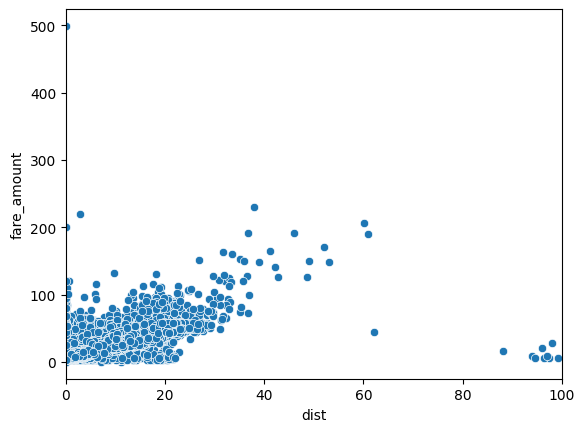

In [33]:
sns.scatterplot(x=df_nyc_pickup['dist'], y=df_nyc_pickup['fare_amount'])
plt.xlim([0, 100])

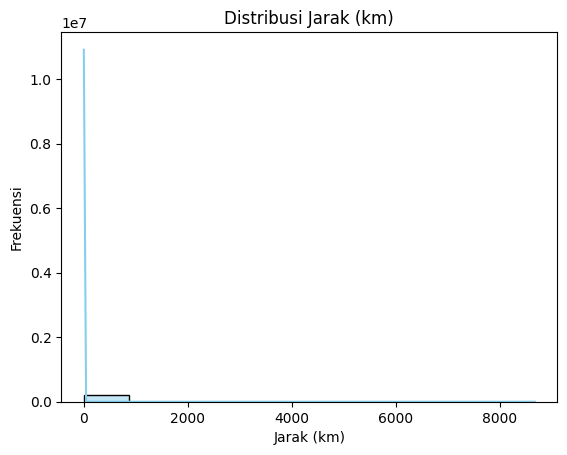

In [34]:
sns.histplot(df_nyc_pickup['dist'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Jarak (km)')
plt.xlabel('Jarak (km)')
plt.ylabel('Frekuensi')
plt.show()

Terlalu Banyak Outlier

In [35]:
(df_nyc_pickup['dist'] > 100).sum()

np.int64(37)

In [36]:
df_nyc_pickup[df_nyc_pickup['dist'] > 100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
17926,5.3,2012-02-18 11:43:00+00:00,-73.962162,40.763307,-4.933332,40.774010,1,2012,2,5,11,winter,0,off_peak,5651.396519
19692,10.5,2011-02-14 16:29:32+00:00,-73.980805,40.747867,-73.957898,39.608972,1,2011,2,0,16,winter,0,off_peak,126.654338
19846,10.5,2011-09-11 11:58:00+00:00,-74.005492,40.738877,-73.967477,0.760607,3,2011,9,6,11,fall,3,off_peak,4445.382454
22079,17.7,2011-02-05 02:20:22+00:00,-74.004872,40.729857,-73.948185,39.604057,2,2011,2,5,2,winter,0,night,125.275929
37122,17.3,2011-05-28 07:49:41+00:00,-73.967302,40.759383,-75.458979,39.653763,1,2011,5,5,7,spring,1,off_peak,176.519082
37741,8.9,2011-03-13 18:12:20+00:00,-73.968131,40.765590,-73.972395,39.618371,2,2011,3,6,18,spring,1,rush_hour,127.565412
52972,10.5,2012-08-07 11:31:00+00:00,-73.987150,40.687925,-0.050000,40.712542,6,2012,8,1,11,summer,2,off_peak,6032.176201
53199,19.3,2011-04-15 13:08:53+00:00,-74.006697,40.705730,-73.949133,39.609582,1,2011,4,4,13,spring,1,rush_hour,121.984292
60414,7.7,2012-01-14 01:33:00+00:00,-73.982242,40.771450,-7.980425,40.745385,1,2012,1,5,1,winter,0,night,5418.658814
70889,4.5,2009-06-02 16:31:00+00:00,-73.999647,40.768180,0.000213,-0.000013,1,2009,6,1,16,summer,2,off_peak,8667.693178


In [37]:
df_nyc_pickup[(df_nyc_pickup['dist'] > 60) & (df_nyc_pickup['dist'] < 100)]
df60_100 = df_nyc_pickup[(df_nyc_pickup['dist'] > 60) & (df_nyc_pickup['dist'] < 100)]

In [38]:
df60_100

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
18415,190.00,2012-07-29 08:28:11+00:00,-73.797236,40.665420,-73.101445,40.812208,1,2012,7,6,8,summer,2,off_peak,60.851156
23682,206.38,2014-11-02 22:40:20+00:00,-73.782161,40.644601,-74.449079,40.836457,1,2014,11,6,22,fall,3,off_peak,60.100889
33199,20.10,2010-06-09 21:05:49+00:00,-73.960267,40.765465,-73.137393,41.366138,1,2010,6,2,21,summer,2,off_peak,96.021362
67231,6.10,2010-06-14 09:07:16+00:00,-73.975333,40.759635,-73.137393,41.366138,1,2010,6,0,9,summer,2,off_peak,97.382812
89971,8.10,2009-09-28 17:36:06+00:00,-73.948564,40.782308,-73.137393,41.366138,1,2009,9,0,17,fall,3,off_peak,94.009832
97989,5.30,2009-04-19 22:40:53+00:00,-73.984003,40.743455,-73.137393,41.366138,4,2009,4,6,22,spring,1,off_peak,99.162509
101692,27.70,2009-05-19 16:53:43+00:00,-73.985779,40.758935,-73.137393,41.366138,1,2009,5,1,16,spring,1,off_peak,98.070305
108759,5.30,2009-01-11 14:38:04+00:00,-73.967587,40.765662,-73.137393,41.366138,1,2009,1,6,14,winter,0,off_peak,96.447944
113678,5.30,2010-07-05 10:15:02+00:00,-73.946219,40.772729,-73.137393,41.366138,1,2010,7,0,10,summer,2,off_peak,94.611052
116191,8.90,2009-11-20 19:51:14+00:00,-73.964483,40.756388,-73.137393,41.366138,1,2009,11,4,19,fall,3,rush_hour,96.981946


In [39]:
import folium
from IPython.display import display

# Ambil titik awal sebagai pusat peta (tengah NYC)
nyc_center = [40.7128, -74.0060]  # NYC lat-lon

# Inisialisasi peta
m = folium.Map(location=nyc_center, zoom_start=9)

# Ambil 100 sampel untuk efisiensi visualisasi
sampled_df = df60_100.sample(n=10, random_state=1)

# Tambahkan garis perjalanan dan titik pickup/dropoff
for _, row in sampled_df.iterrows():
    pickup = [row['pickup_latitude'], row['pickup_longitude']]
    dropoff = [row['dropoff_latitude'], row['dropoff_longitude']]

    # Garis rute
    folium.PolyLine(locations=[pickup, dropoff], color='blue', weight=2, opacity=0.5).add_to(m)

    # Titik pickup
    folium.CircleMarker(location=pickup, radius=4, color='green', fill=True, fill_opacity=0.7).add_to(m)

    # Titik dropoff
    folium.CircleMarker(location=dropoff, radius=4, color='red', fill=True, fill_opacity=0.7).add_to(m)

# Tampilkan peta
display(m)

In [40]:
from IPython.display import display
display(m)

Terlihat tidak meyakinkan > 60km, kita cek 40km

In [41]:
df_35_61 = df_nyc_pickup[(df_nyc_pickup['dist'] > 35) & (df_nyc_pickup['dist'] < 61)]
df_35_61

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
9060,126.10,2011-06-13 15:46:00+00:00,-73.788657,40.640643,-74.001350,41.048048,1,2011,6,0,15,summer,2,off_peak,48.706330
18415,190.00,2012-07-29 08:28:11+00:00,-73.797236,40.665420,-73.101445,40.812208,1,2012,7,6,8,summer,2,off_peak,60.851156
23148,126.83,2014-06-11 16:15:00+00:00,-73.781277,40.644915,-73.760570,41.029780,1,2014,6,2,16,summer,2,off_peak,42.830475
23682,206.38,2014-11-02 22:40:20+00:00,-73.782161,40.644601,-74.449079,40.836457,1,2014,11,6,22,fall,3,off_peak,60.100889
33609,100.00,2013-12-20 01:34:00+00:00,-74.005518,40.738890,-74.438630,40.683112,1,2013,12,4,1,winter,0,night,37.028695
36333,148.33,2013-06-19 18:27:00+00:00,-73.806845,40.685285,-73.853342,41.161225,1,2013,6,2,18,summer,2,rush_hour,53.066101
39716,191.80,2012-06-26 22:28:00+00:00,-73.822978,40.788500,-73.548110,41.045037,1,2012,6,1,22,summer,2,off_peak,36.703299
45094,170.00,2014-11-10 16:55:00+00:00,-73.789297,40.643437,-74.402822,40.698832,1,2014,11,0,16,fall,3,off_peak,52.108219
72782,147.80,2012-03-16 18:20:00+00:00,-73.876337,40.772152,-73.567932,41.033868,1,2012,3,4,18,spring,1,rush_hour,38.970571
87154,140.25,2013-06-23 18:59:45+00:00,-73.960012,40.773023,-74.031707,41.149037,1,2013,6,6,18,summer,2,rush_hour,42.242033


In [42]:
import folium

# Ambil titik awal sebagai pusat peta (tengah NYC)
nyc_center = [40.7128, -74.0060]  # NYC lat-lon

# Inisialisasi peta
m = folium.Map(location=nyc_center, zoom_start=9)

# Ambil 100 sampel untuk efisiensi visualisasi
sampled_df = df_35_61

# Tambahkan garis perjalanan dan titik pickup/dropoff
for _, row in sampled_df.iterrows():
    pickup = [row['pickup_latitude'], row['pickup_longitude']]
    dropoff = [row['dropoff_latitude'], row['dropoff_longitude']]

    # Garis rute
    folium.PolyLine(locations=[pickup, dropoff], color='blue', weight=2, opacity=0.5).add_to(m)

    # Titik pickup
    folium.CircleMarker(location=pickup, radius=4, color='green', fill=True, fill_opacity=0.7).add_to(m)

    # Titik dropoff
    folium.CircleMarker(location=dropoff, radius=4, color='red', fill=True, fill_opacity=0.7).add_to(m)

# Tampilkan peta
m


In [43]:
#Kita drop diatas 61km
df_clear = df_nyc_pickup[df_nyc_pickup['dist'] < 61]

(0.0, 60.0)

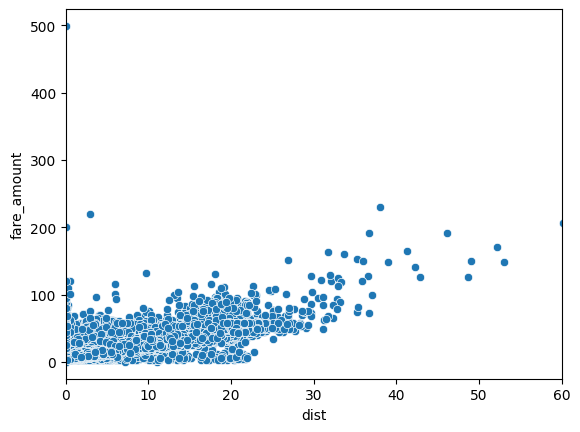

In [44]:
sns.scatterplot(x=df_clear['dist'], y=df_clear['fare_amount'])
plt.xlim([0, 60])

In [45]:
indices = df_clear[df_clear['dist'] == 0].index
df_clear.drop(indices, axis=0, inplace=True)
df_clear.reset_index(drop=True, inplace=True)
df_clear

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\1084454413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2,rush_hour,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2,off_peak,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2,off_peak,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192851,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3,off_peak,0.112210
192852,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1,night,1.875050
192853,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2,night,12.850319
192854,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1,off_peak,3.539715


In [46]:
indices = df_clear[(df_clear['fare_amount'] < 1) & (df_clear['dist'] > 1)].index
df_clear.drop(indices, axis=0, inplace=True)
df_clear.reset_index(drop=True, inplace=True)
df_clear

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\150737574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2,rush_hour,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2,off_peak,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2,off_peak,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192849,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3,off_peak,0.112210
192850,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1,night,1.875050
192851,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2,night,12.850319
192852,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1,off_peak,3.539715


In [47]:
indices = df_clear[(df_clear['fare_amount'] > 100) & (df_clear['dist'] < 1)].index
df_clear.drop(indices, axis=0, inplace=True)
df_clear.reset_index(drop=True, inplace=True)
df_clear

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\2984548562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2,rush_hour,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2,off_peak,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2,off_peak,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192842,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3,off_peak,0.112210
192843,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1,night,1.875050
192844,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2,night,12.850319
192845,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1,off_peak,3.539715


(0.0, 62.0)

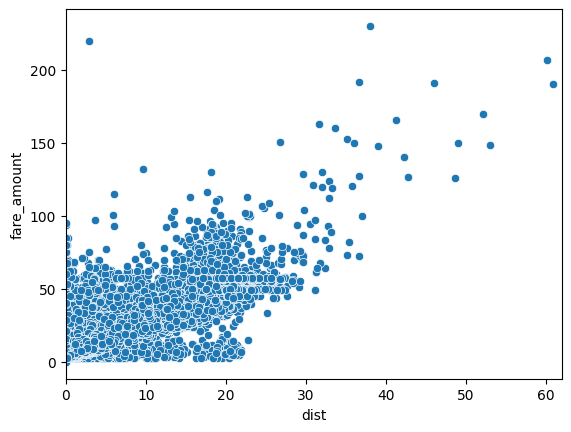

In [48]:
sns.scatterplot(x=df_clear['dist'], y=df_clear['fare_amount'])
plt.xlim([0, 62])

In [49]:
# Hitung fare per km
df_clear['fare_per_km'] = df_clear['fare_amount'] / df_clear['dist']

# Buang nilai tidak valid (misalnya dist = 0)
df_clear = df_clear[df_clear['fare_per_km'].notna() & df_clear['fare_per_km'] != np.inf]

# Menggunakan IQR untuk deteksi outlier pada fare_per_km
Q1 = df_clear['fare_per_km'].quantile(0.25)
Q3 = df_clear['fare_per_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data yang masuk akal
df_clear = df_clear[(df_clear['fare_per_km'] >= lower_bound) & (df_clear['fare_per_km'] <= upper_bound)]

# Hapus kolom bantu jika tidak diperlukan
df_clear.drop(columns='fare_per_km', inplace=True)

# (Opsional) Tampilkan hasil
print(f"Jumlah data setelah filter: {len(df_clear)}")


Jumlah data setelah filter: 181895


C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\3706786517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['fare_per_km'] = df_clear['fare_amount'] / df_clear['dist']


# EDA

In [50]:
num_cols = df_clear.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
num_cols

Index(['fare_amount', 'passenger_count', 'pickup_year', 'pickup_month',
       'pickup_weekday', 'pickup_hour', 'season_code', 'dist'],
      dtype='object')

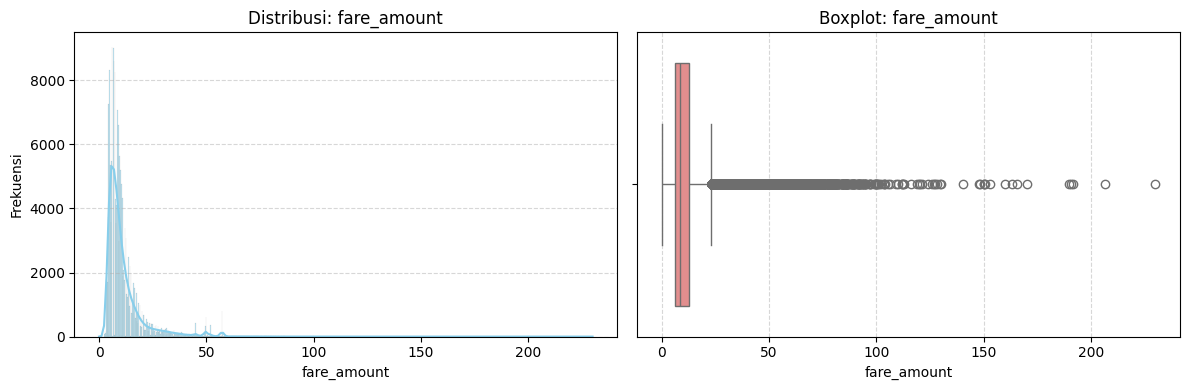

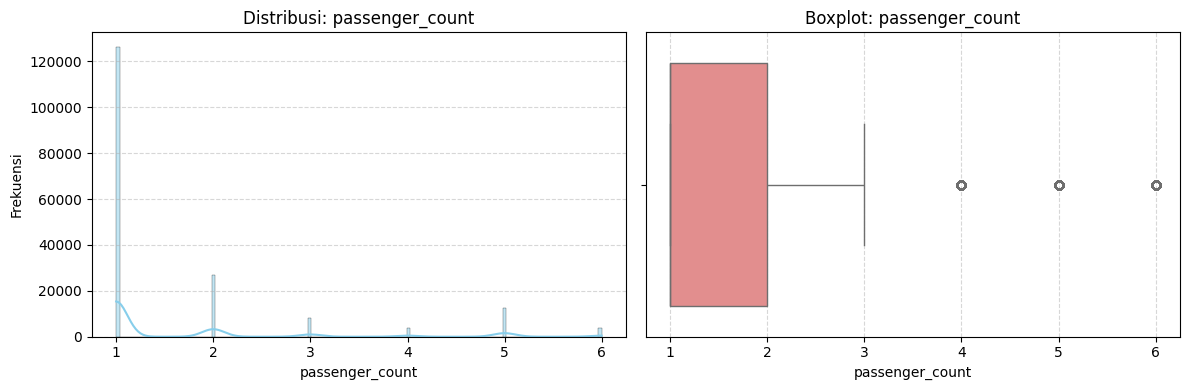

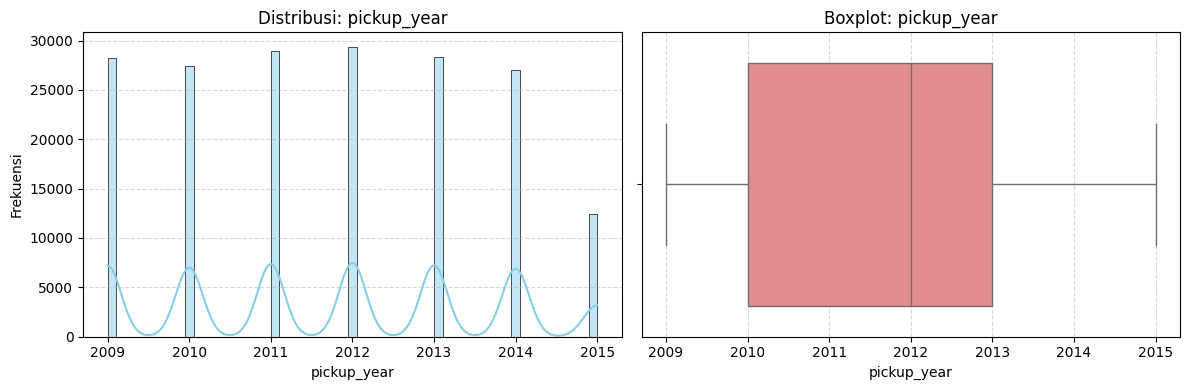

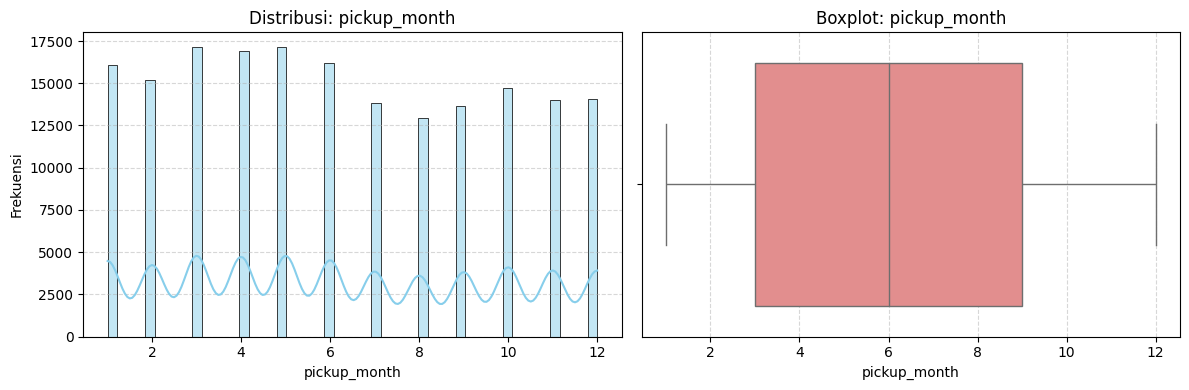

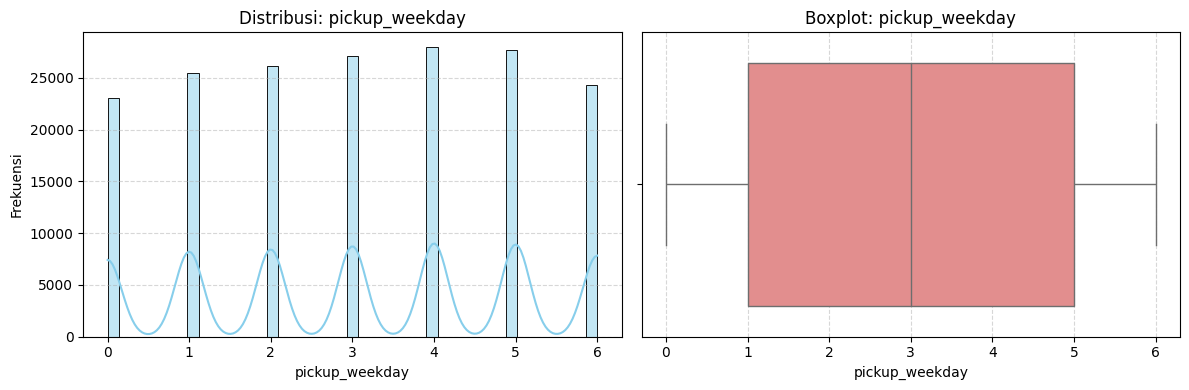

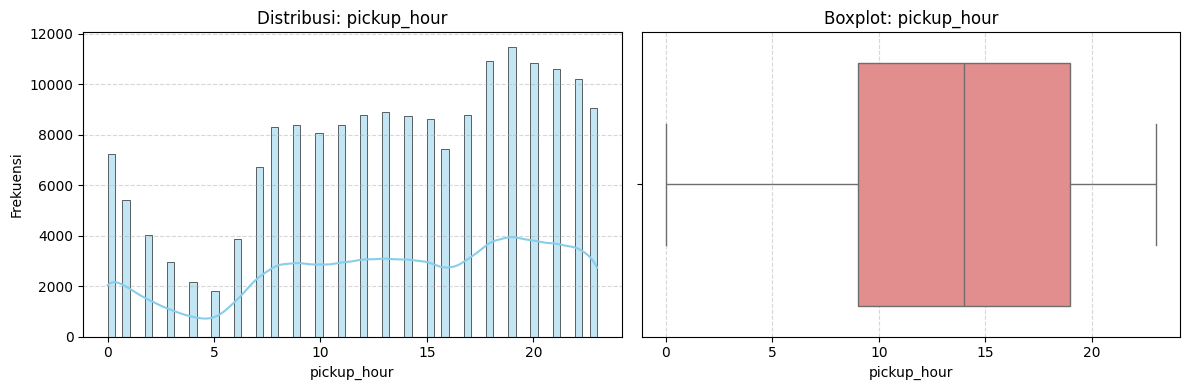

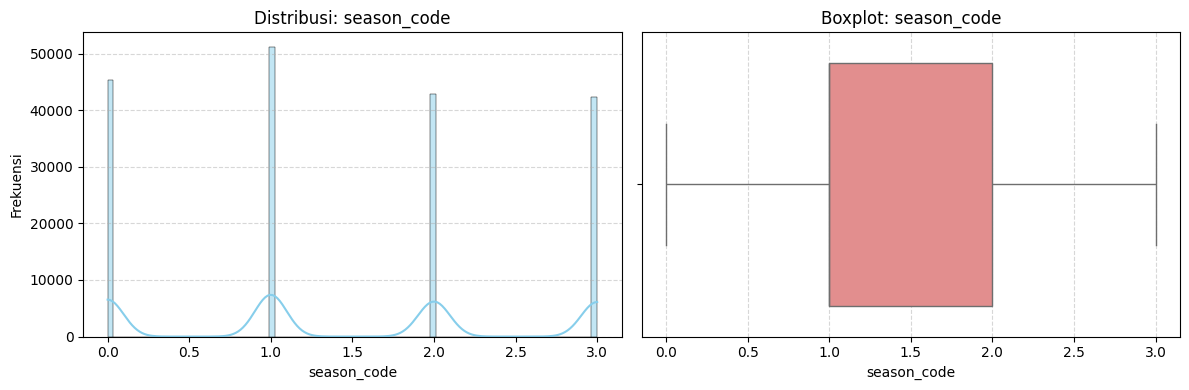

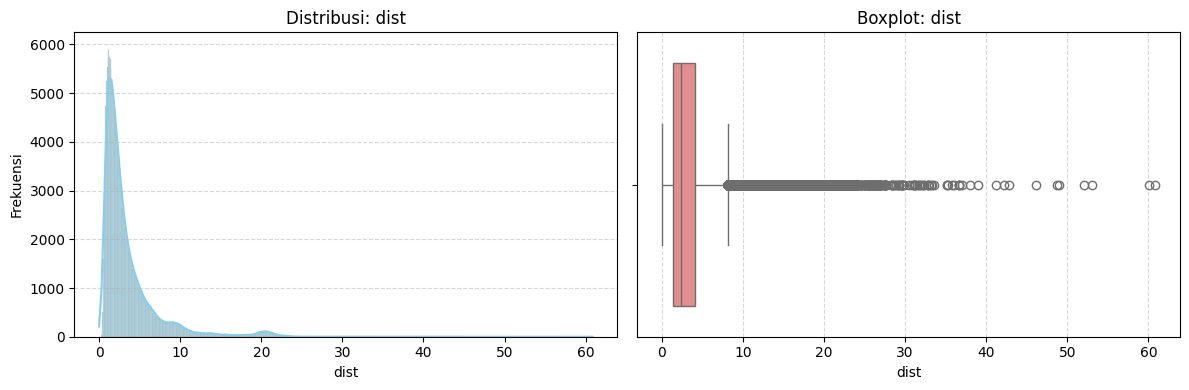

In [51]:
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Histplot (distribusi)
    sns.histplot(df_clear[col], kde=True, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'Distribusi: {col}', fontsize=12)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frekuensi')
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)

    # Boxplot (outlier)
    sns.boxplot(x=df_clear[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot: {col}', fontsize=12)
    axes[1].set_xlabel(col)
    axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)

    # Optimalkan layout
    plt.tight_layout()
    plt.show()


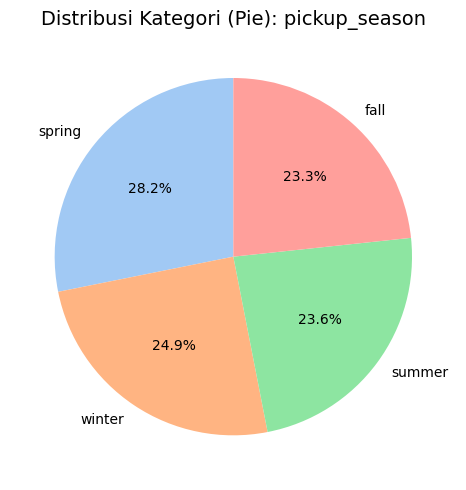

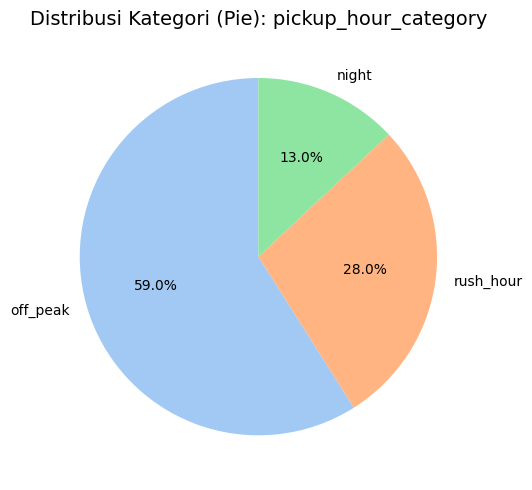

In [52]:
cat_cols = df.select_dtypes(include='O').columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    unique_vals = df_clear[col].nunique()

    if unique_vals < 7:
        # Pie chart (kategori sedikit)
        dff = df_clear[col].value_counts().reset_index()
        dff.columns = [col, 'count']
        plt.pie(
            dff['count'],
            labels=dff[col],
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("pastel")
        )
        plt.title(f"Distribusi Kategori (Pie): {col}", fontsize=14)

    elif unique_vals < 50:
        # Countplot standar
        sns.countplot(x=col, data=df_clear, palette="Set2")
        plt.title(f"Distribusi Kategori (Countplot): {col}", fontsize=14)
        plt.xticks(rotation=45)

    else:
        # Top 10 kategori terbanyak
        top10 = df_clear[col].value_counts().nlargest(10).index
        dff = df_clear[df_clear[col].isin(top10)]
        sns.countplot(x=col, data=dff, order=top10, palette="Set3")
        plt.title(f"Top 10 Kategori Terbanyak: {col}", fontsize=14)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

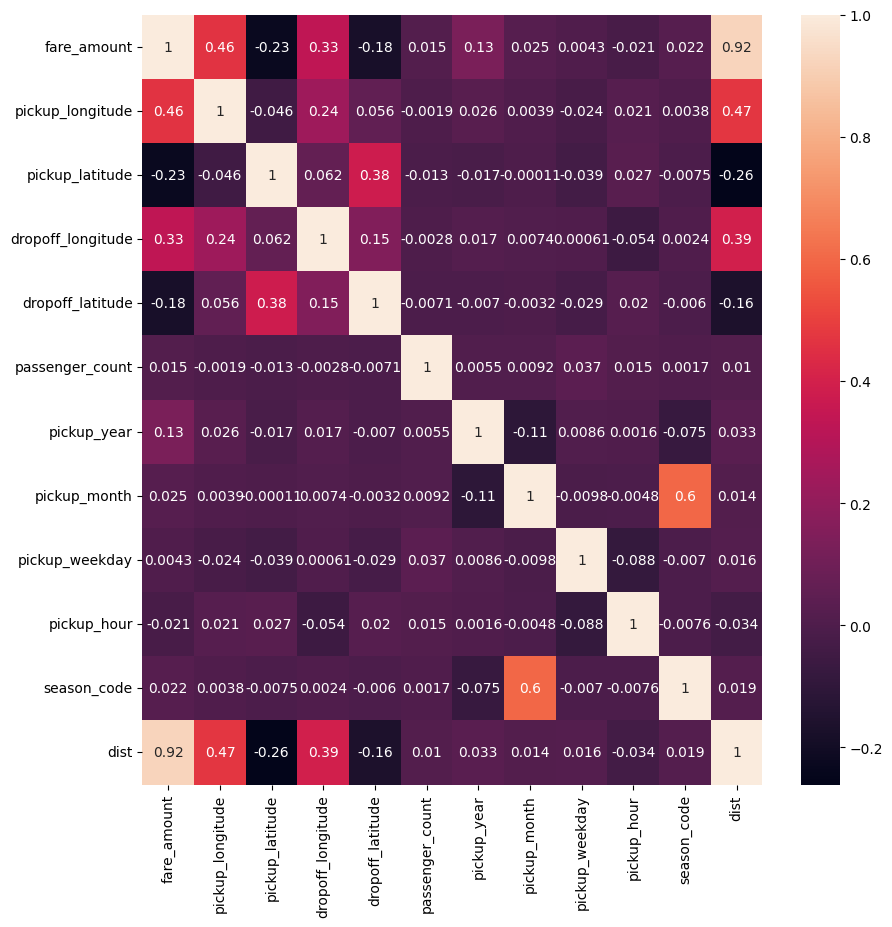

In [53]:
# bi-variate analysis
plt.figure(figsize=(10, 10))
sns.heatmap(df_clear.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [56]:
dff = df_clear.groupby("pickup_year")[['fare_amount']].mean().reset_index().sort_values(by='pickup_year')
dff
px.line(x=dff['pickup_year'], y=dff['fare_amount'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': '2QcAANoHAADbBwAA3AcAAN0HAADeBwAA3wcAAA==', 'dtype': 'i4'},
              'xaxis': 'x',
              'y': {'bdata': 'B79kwF0SJECsTOc6+xgkQKCGQ6R15CRAQWwt5QCkJkC/lEUUubYpQE2AYYAHUCpAfrwTg2l3KkA=',
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\3958866812.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\3958866812.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




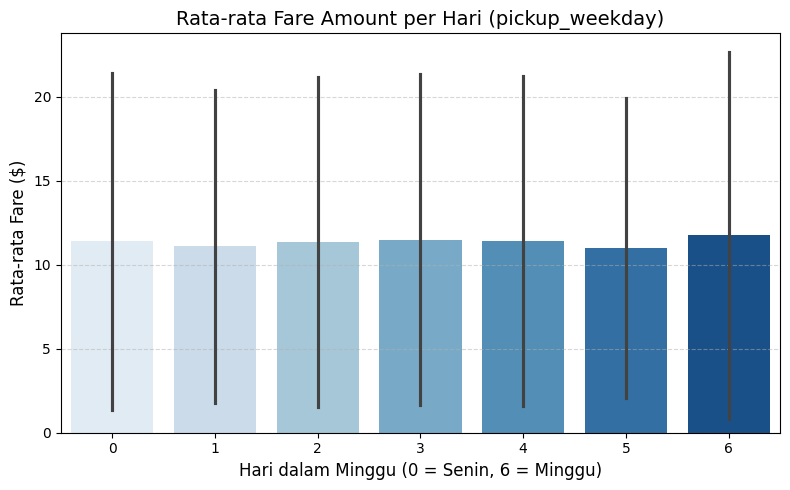

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='pickup_weekday',
    y='fare_amount',
    data=df,
    estimator=np.mean,
    palette='Blues',
    ci='sd'  # tampilkan deviasi standar sebagai error bar
)

plt.title('Rata-rata Fare Amount per Hari (pickup_weekday)', fontsize=14)
plt.xlabel('Hari dalam Minggu (0 = Senin, 6 = Minggu)', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\701960481.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\701960481.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




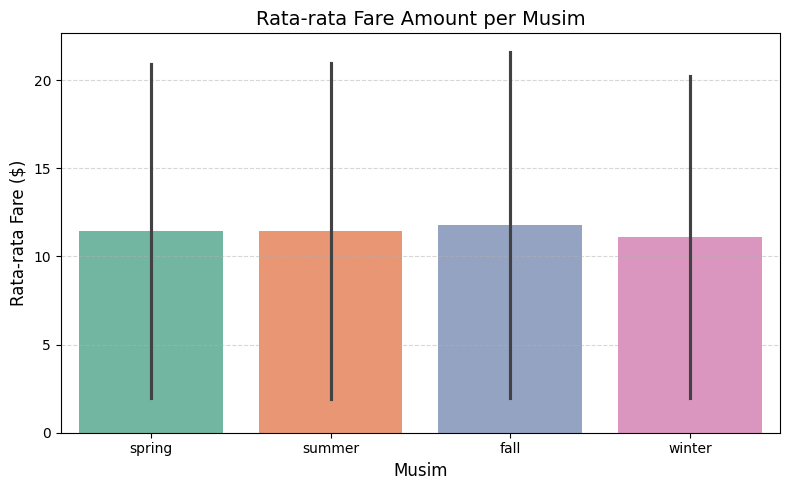

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clear,
    x='pickup_season',
    y='fare_amount',
    estimator=np.mean,
    ci='sd',  # tambahkan error bar berupa standar deviasi
    palette='Set2'
)

plt.title('Rata-rata Fare Amount per Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\1325100114.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\1325100114.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




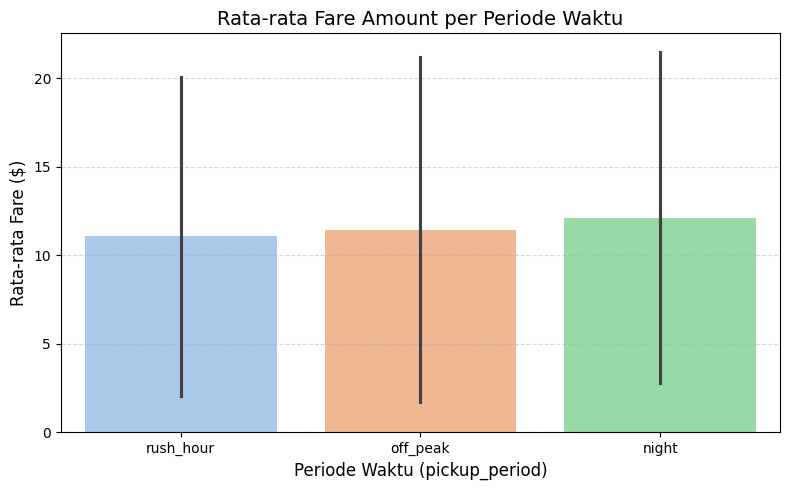

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clear,
    x='pickup_hour_category',
    y='fare_amount',
    estimator=np.mean,
    ci='sd',  # tambahkan error bar
    palette='pastel'
)

plt.title('Rata-rata Fare Amount per Periode Waktu', fontsize=14)
plt.xlabel('Periode Waktu (pickup_period)', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\2074021576.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\thesa\AppData\Local\Temp\ipykernel_46672\2074021576.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




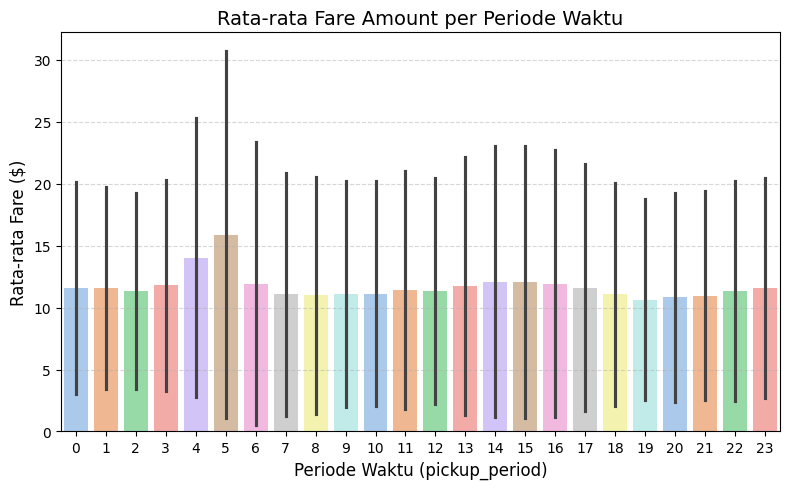

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clear,
    x='pickup_hour',
    y='fare_amount',
    estimator=np.mean,
    ci='sd',  # tambahkan error bar
    palette='pastel'
)

plt.title('Rata-rata Fare Amount per Periode Waktu', fontsize=14)
plt.xlabel('Periode Waktu (pickup_period)', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


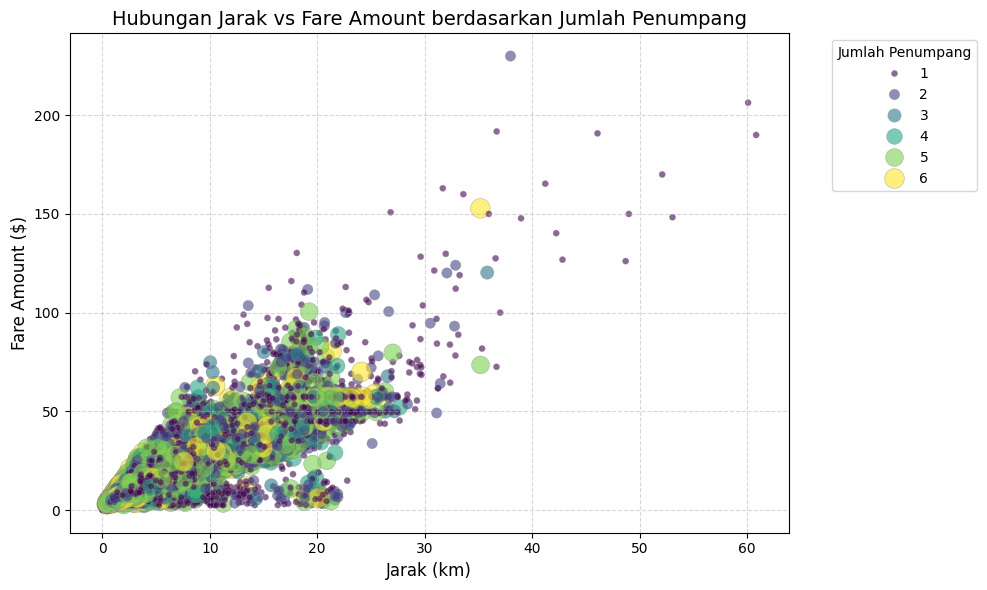

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clear,
    x='dist',
    y='fare_amount',
    size='passenger_count',
    hue='passenger_count',
    sizes=(20, 200),
    palette='viridis',
    alpha=0.6,
    edgecolor='gray'
)

plt.title('Hubungan Jarak vs Fare Amount berdasarkan Jumlah Penumpang', fontsize=14)
plt.xlabel('Jarak (km)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Jumlah Penumpang', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Data Preprocessing

In [62]:
dfp = df_clear.copy()

In [63]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181895 entries, 0 to 192846
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           181895 non-null  float64            
 1   pickup_datetime       181895 non-null  datetime64[ns, UTC]
 2   pickup_longitude      181895 non-null  float64            
 3   pickup_latitude       181895 non-null  float64            
 4   dropoff_longitude     181895 non-null  float64            
 5   dropoff_latitude      181895 non-null  float64            
 6   passenger_count       181895 non-null  int64              
 7   pickup_year           181895 non-null  int32              
 8   pickup_month          181895 non-null  int32              
 9   pickup_weekday        181895 non-null  int32              
 10  pickup_hour           181895 non-null  int32              
 11  pickup_season         181895 non-null  object            

In [64]:
#Menghapus empat kolom koordinat geografis dari DataFrame
dfp.drop(columns = {"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"},inplace=True)

In [65]:
dfp

,fare_amount,pickup_datetime,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,1,2009,7,4,20,summer,2,rush_hour,2.457590
2,12.9,2009-08-24 21:45:00+00:00,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,3,2009,6,4,8,summer,2,off_peak,1.661683
4,16.0,2014-08-28 17:47:00+00:00,5,2014,8,3,17,summer,2,off_peak,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
192840,9.5,2012-09-29 19:51:27+00:00,1,2012,9,5,19,fall,3,rush_hour,2.640893
192843,7.5,2014-03-14 01:09:00+00:00,1,2014,3,4,1,spring,1,night,1.875050
192844,30.9,2009-06-29 00:42:00+00:00,2,2009,6,0,0,summer,2,night,12.850319
192845,14.5,2015-05-20 14:56:25+00:00,1,2015,5,2,14,spring,1,off_peak,3.539715


### Menghitung dan Menangani Outlier per Kolom dengan Metode IQR dan filter

Untuk mendeteksi outlier pada setiap kolom numerik, kita dapat menggunakan metode IQR (*Interquartile Range*).

Outlier didefinisikan sebagai data yang:

- Lebih kecil dari:  
  $$ \text{Lower Bound} = Q1 - 1.5 \times IQR $$

- Atau lebih besar dari:  
  $$ \text{Upper Bound} = Q3 + 1.5 \times IQR $$

Dengan keterangan:

- $Q1$: kuartil pertama (25%)  
- $Q3$: kuartil ketiga (75%)  
- $IQR = Q3 - Q1$: rentang antar kuartil


In [66]:
dfp.to_csv('dfp_fix.csv', index=False)

In [67]:
# Menghitung jumlah dan persentase outlier per kolom numerik
for col in dfp.select_dtypes(include='number').columns:
    Q1 = dfp[col].quantile(0.25)
    Q3 = dfp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dfp[(dfp[col] < lower_bound) | (dfp[col] > upper_bound)]
    print(f'Kolom: {col}')
    print(f'Jumlah outlier: {len(outliers)}')
    print(f'Persentase outlier: {100 * len(outliers) / len(dfp):.2f}%\n')

Kolom: fare_amount
Jumlah outlier: 14771
Persentase outlier: 8.12%

Kolom: passenger_count
Jumlah outlier: 20461
Persentase outlier: 11.25%

Kolom: pickup_year
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: pickup_month
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: pickup_weekday
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: pickup_hour
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: season_code
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: dist
Jumlah outlier: 15189
Persentase outlier: 8.35%



In [68]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181895 entries, 0 to 192846
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           181895 non-null  float64            
 1   pickup_datetime       181895 non-null  datetime64[ns, UTC]
 2   passenger_count       181895 non-null  int64              
 3   pickup_year           181895 non-null  int32              
 4   pickup_month          181895 non-null  int32              
 5   pickup_weekday        181895 non-null  int32              
 6   pickup_hour           181895 non-null  int32              
 7   pickup_season         181895 non-null  object             
 8   season_code           181895 non-null  int64              
 9   pickup_hour_category  181895 non-null  object             
 10  dist                  181895 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int32(4), int64(2)

In [69]:
def remove_outliers_iqr(dfp, column):
    Q1 = dfp[column].quantile(0.25)
    Q3 = dfp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dfp[(dfp[column] >= lower) & (dfp[column] <= upper)]

for col in ['fare_amount', 'passenger_count', 'distance']:
    if col in dfp.columns:
        dfp = remove_outliers_iqr(dfp, col)

In [73]:
# Menghitung jumlah dan persentase outlier per kolom numerik
for col in dfp.select_dtypes(include='number').columns:
    Q1 = dfp[col].quantile(0.25)
    Q3 = dfp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dfp[(dfp[col] < lower_bound) | (dfp[col] > upper_bound)]
    print(f'Kolom: {col}')
    print(f'Jumlah outlier: {len(outliers)}')
    print(f'Persentase outlier: {100 * len(outliers) / len(dfp):.2f}%\n')

Kolom: fare_amount
Jumlah outlier: 5100
Persentase outlier: 3.44%

Kolom: passenger_count
Jumlah outlier: 31995
Persentase outlier: 21.56%

Kolom: pickup_year
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: pickup_month
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: pickup_weekday
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: pickup_hour
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: season_code
Jumlah outlier: 0
Persentase outlier: 0.00%

Kolom: dist
Jumlah outlier: 6594
Persentase outlier: 4.44%



In [74]:
dfp['passenger_count'].value_counts()

passenger_count
1    116424
2     24531
3      7464
Name: count, dtype: int64

##Split Features & Target

In [75]:
#Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

##Log Transform

In [76]:
#Log-transform target
y_log = np.log1p(y)

#Hanya kolom 'dist' yang ditransformasi log
X_log = X.copy()
X_log['dist'] = np.log1p(X_log['dist'])

In [77]:
# Filter outliers in fare_amount using IQR
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

# Filter outliers in passenger_count (keep only reasonable values, e.g. 1-6)
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

print('Jumlah data setelah filter outlier:', df.shape)
df.describe()

Jumlah data setelah filter outlier: (178576, 15)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,season_code,dist
count,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000,178576.000000
mean,8.943295,-73.914491,40.694310,-73.912842,40.693799,1.687069,2011.701645,6.264823,3.050360,13.533795,1.448885,3.717154
std,4.138450,2.648615,2.519440,2.643298,2.523809,1.304431,1.857808,3.443168,1.942699,6.511037,1.102262,80.910696
min,0.000000,-93.824668,-74.009697,-75.458979,-74.015750,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,-73.992589,40.737095,-73.991852,40.736840,1.000000,2010.000000,3.000000,1.000000,9.000000,0.000000,1.199005
50%,8.000000,-73.982499,40.753186,-73.981222,40.753832,1.000000,2012.000000,6.000000,3.000000,14.000000,1.000000,1.990009
75%,11.000000,-73.970239,40.766868,-73.967934,40.767796,2.000000,2013.000000,9.000000,5.000000,19.000000,2.000000,3.308025
max,22.200000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000,3.000000,8667.693178


##Split train/test

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [79]:
dfp.head()

,fare_amount,pickup_datetime,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,1,2009,7,4,20,summer,2,rush_hour,2.457590
2,12.9,2009-08-24 21:45:00+00:00,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,3,2009,6,4,8,summer,2,off_peak,1.661683
6,9.7,2012-02-17 09:32:00+00:00,1,2012,2,4,9,winter,0,off_peak,2.332711


##Pisahkan berdasarkan jenis

In [80]:
# Fitur numerik
numeric_features = ['passenger_count', 'dist', 'pickup_year']

# Fitur ordinal (berurutan secara logis)
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]

# Fitur nominal (kategori tanpa urutan)
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

##Ordinal Encoding

In [81]:
from sklearn.preprocessing import OrdinalEncoder

# Inisialisasi dan transformasi ordinal
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

X_train[ordinal_features] = ordinal_encoder.fit_transform(X_train[ordinal_features])
X_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])

##One-Hot Encoding
Kolom pickup_hour_category bertipe kategori nominal, yaitu tidak memiliki urutan logis antar nilainya (misalnya: rush_hour, off_peak).

Jika diberi label angka langsung (Label Encoding), model bisa salah mengasumsikan adanya hubungan matematis antar kategori, padahal hubungan itu tidak ada.

Oleh karena itu, digunakan One-Hot Encoding untuk mengubah setiap kategori menjadi kolom biner (0/1) agar:
* Tidak ada asumsi urutan
* Representasi kategori lebih akurat
* Model tidak terjebak interpretasi yang salah

In [82]:
# One-Hot Encoding untuk fitur nominal
X_train = pd.get_dummies(X_train, columns=nominal_features, drop_first=True).astype(int)
X_test = pd.get_dummies(X_test, columns=nominal_features, drop_first=True).astype(int)

# Samakan kolom antara train dan test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

##Scaling fitur numerik
Wajib untuk model seperti:
* Linear Regression
* Logistic Regression
* SVM
* KNN

Tidak perlu kalau pakai:
* Decision Tree
* Random Forest
* XGBoost

In [83]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Lakukan scaling
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

In [84]:
X_train.head()

,pickup_datetime,passenger_count,pickup_year,pickup_season,season_code,dist,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,...,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,pickup_hour_category_off_peak,pickup_hour_category_rush_hour
99314,1422041938000000000,1,2015,0,0,6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
90119,1335466200000000000,1,2012,1,1,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
83203,1248676124000000000,1,2009,2,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14039,1419966205000000000,1,2014,0,0,5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
109852,1427652742000000000,1,2015,1,1,5,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [85]:
print(X_train.dtypes)

pickup_datetime                   int64
passenger_count                   int64
pickup_year                       int64
pickup_season                     int64
season_code                       int64
dist                              int64
pickup_month_2                    int64
pickup_month_3                    int64
pickup_month_4                    int64
pickup_month_5                    int64
pickup_month_6                    int64
pickup_month_7                    int64
pickup_month_8                    int64
pickup_month_9                    int64
pickup_month_10                   int64
pickup_month_11                   int64
pickup_month_12                   int64
pickup_weekday_1                  int64
pickup_weekday_2                  int64
pickup_weekday_3                  int64
pickup_weekday_4                  int64
pickup_weekday_5                  int64
pickup_weekday_6                  int64
pickup_hour_1                     int64
pickup_hour_2                     int64


In [86]:
print(X_train.isnull().sum())

pickup_datetime                   0
passenger_count                   0
pickup_year                       0
pickup_season                     0
season_code                       0
dist                              0
pickup_month_2                    0
pickup_month_3                    0
pickup_month_4                    0
pickup_month_5                    0
pickup_month_6                    0
pickup_month_7                    0
pickup_month_8                    0
pickup_month_9                    0
pickup_month_10                   0
pickup_month_11                   0
pickup_month_12                   0
pickup_weekday_1                  0
pickup_weekday_2                  0
pickup_weekday_3                  0
pickup_weekday_4                  0
pickup_weekday_5                  0
pickup_weekday_6                  0
pickup_hour_1                     0
pickup_hour_2                     0
pickup_hour_3                     0
pickup_hour_4                     0
pickup_hour_5               

# Modelling dan Evaluation

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 2. Split fitur & target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preprocessing manual
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# Standardize numeric
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

# Ordinal encode
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
X_train_ord = ordinal_encoder.fit_transform(X_train[ordinal_features])
X_test_ord = ordinal_encoder.transform(X_test[ordinal_features])

# One-hot encode nominal
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[nominal_features])
X_test_cat = ohe.transform(X_test[nominal_features])

# Gabungkan semua
X_train_final = np.hstack([X_train_num, X_train_ord, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_ord, X_test_cat])
X_all = np.vstack([X_train_final, X_test_final])
y_all = np.hstack([y_train, y_test])

# 4. Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 5. Evaluasi semua model
results = []

for name, model in models.items():
    model.fit(X_train_final, y_train)

    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
    cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        'Model': name,
        'Train R2': round(train_r2, 4),
        'Test R2': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 4),
        'Test RMSE': round(test_rmse, 4),
        'Train MAE': round(train_mae, 4),
        'Test MAE': round(test_mae, 4),
        'CV R2 Mean': round(cv_r2.mean(), 4),
        'CV RMSE Mean': round(cv_rmse.mean(), 4)
    })

# 6. Tampilkan hasil perbandingan
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
print("\n📊 Hasil Evaluasi Lengkap 6 Model Regressor:\n")
print(results_df)

###Kriteria Pemilihan Model Terbaik
1. Test RMSE (Root Mean Squared Error) — semakin rendah, semakin baik. Ini yang paling umum digunakan.
2. Test R² (R-squared) — semakin mendekati 1, semakin baik.
3. Test MAE (Mean Absolute Error) — juga semakin rendah, semakin baik.
4. CV R² Mean — kestabilan performa saat diuji silang (cross-validation); semakin tinggi, semakin stabil.
5. CV RMSE Mean — error rata-rata cross-validation; semakin rendah, semakin baik.

Model Terbaik: Gradient Boosting
Karena:
* Memiliki Test RMSE terendah (1.8795)
* Test R² tertinggi (0.8036)
* MAE dan hasil cross-validation juga lebih baik dibanding model lain.

In [ ]:
# --- LOG TRANSFORMATION & DROP OUTLIER (Fare, Dist) ---

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Drop Outlier pada fare dan dist
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)]  # sesuaikan threshold jika perlu

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

# 4. Log-transform target
y_log = np.log1p(y)

# 5. Split train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. Log-transform fitur 'dist'
X_train = X_train.copy()
X_test = X_test.copy()
X_train['dist'] = np.log1p(X_train['dist'])
X_test['dist'] = np.log1p(X_test['dist'])

# 7. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 8. Inisialisasi encoder & scaler
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all_log = np.hstack([y_train_log, y_test_log])

# --- TRAINING & EVALUASI ---
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train model
model.fit(X_train_final, y_train_log)

# Predict
y_train_pred_log = model.predict(X_train_final)
y_test_pred_log = model.predict(X_test_final)

# Inverse log1p
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-validation (on log-transformed target)
cv_r2 = cross_val_score(model, X_all, y_all_log, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all_log, cv=5, scoring='neg_root_mean_squared_error')

# Output hasil
print("\n📊 Hasil Evaluasi Gradient Boosting dengan Log Transform & Drop Outlier Fare + Dist:\n")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2:  {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")
print(f"Train MAE:  {train_mae:.4f}")
print(f"Test MAE:   {test_mae:.4f}")
print(f"CV R2 Mean: {cv_r2.mean():.4f}")
print(f"CV RMSE Mean: {cv_rmse.mean():.4f}")

In [ ]:
# --- LOG TRANSFORMATION & DROP OUTLIER (Fare Only) ---
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Drop Outlier pada fare_amount saja (misal threshold 100)
dfp = df[df['fare_amount'] < 100]

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

# 4. Log-transform target
y_log = np.log1p(y)

# 5. Split train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. Log-transform fitur 'dist'
X_train = X_train.copy()
X_test = X_test.copy()
X_train['dist'] = np.log1p(X_train['dist'])
X_test['dist'] = np.log1p(X_test['dist'])

# 7. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 8. Inisialisasi encoder & scaler
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all_log = np.hstack([y_train_log, y_test_log])

# --- TRAINING & EVALUASI ---
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train model
model.fit(X_train_final, y_train_log)

# Predict
y_train_pred_log = model.predict(X_train_final)
y_test_pred_log = model.predict(X_test_final)

# Inverse log1p
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-validation (on log-transformed target)
cv_r2 = cross_val_score(model, X_all, y_all_log, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all_log, cv=5, scoring='neg_root_mean_squared_error')

# Output hasil
print("\n📊 Hasil Evaluasi Gradient Boosting dengan Log Transform & Drop Outlier Fare Only:\n")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2:  {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")
print(f"Train MAE:  {train_mae:.4f}")
print(f"Test MAE:   {test_mae:.4f}")
print(f"CV R2 Mean: {cv_r2.mean():.4f}")
print(f"CV RMSE Mean: {cv_rmse.mean():.4f}")

In [ ]:
# --- LOG TRANSFORMATION & NO OUTLIER ---
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Tidak ada outlier yang di-drop pada tahap ini
dfp = df.copy()

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

# 4. Log-transform target
y_log = np.log1p(y)

# 5. Split train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. Log-transform fitur 'dist'
X_train = X_train.copy()
X_test = X_test.copy()
X_train['dist'] = np.log1p(X_train['dist'])
X_test['dist'] = np.log1p(X_test['dist'])

# 7. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 8. Inisialisasi encoder & scaler
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all_log = np.hstack([y_train_log, y_test_log])

# --- TRAINING & EVALUASI ---
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train model
model.fit(X_train_final, y_train_log)

# Predict
y_train_pred_log = model.predict(X_train_final)
y_test_pred_log = model.predict(X_test_final)

# Inverse log1p
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-validation (on log-transformed target)
cv_r2 = cross_val_score(model, X_all, y_all_log, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all_log, cv=5, scoring='neg_root_mean_squared_error')

# Output hasil
print("\n📊 Hasil Evaluasi Gradient Boosting dengan Log Transform (Tanpa Outlier Removal):\n")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2:  {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")
print(f"Train MAE:  {train_mae:.4f}")
print(f"Test MAE:   {test_mae:.4f}")
print(f"CV R2 Mean: {cv_r2.mean():.4f}")
print(f"CV RMSE Mean: {cv_rmse.mean():.4f}")

In [ ]:
# --- DROP OUTLIER FARE & DIST ---
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 2. Drop Outlier pada fare dan dist
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)]  # threshold bisa disesuaikan

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 5. Inisialisasi Preprocessor
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all = np.hstack([y_train, y_test])

# 6. Model yang Digunakan
models = {
    # 'Linear Regression': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.01),
    # 'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    # 'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 7. Evaluasi Model
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_final, y_train)

    # Predict
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Evaluation metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation
    cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
    cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        'Model': name,
        'Train R2': round(train_r2, 4),
        'Test R2': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 4),
        'Test RMSE': round(test_rmse, 4),
        'Train MAE': round(train_mae, 4),
        'Test MAE': round(test_mae, 4),
        'CV R2 Mean': round(cv_r2.mean(), 4),
        'CV RMSE Mean': round(cv_rmse.mean(), 4)
    })

# 8. Output Hasil Evaluasi
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare & Dist):\n")
print(results_df)

In [ ]:
# --- DROP OUTLIER FARE ONLY ---
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 2. Drop Outlier pada fare_amount saja
dfp = df[df['fare_amount'] < 100]  # threshold bisa disesuaikan

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 5. Inisialisasi Preprocessing
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all = np.hstack([y_train, y_test])

# 6. Model yang Digunakan
models = {
    # 'Linear Regression': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.01),
    # 'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    # 'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 7. Evaluasi Model
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_final, y_train)

    # Predict
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Evaluation metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation
    cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
    cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        'Model': name,
        'Train R2': round(train_r2, 4),
        'Test R2': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 4),
        'Test RMSE': round(test_rmse, 4),
        'Train MAE': round(train_mae, 4),
        'Test MAE': round(test_mae, 4),
        'CV R2 Mean': round(cv_r2.mean(), 4),
        'CV RMSE Mean': round(cv_rmse.mean(), 4)
    })

# 8. Output Hasil Evaluasi
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare Only):\n")
print(results_df)

In [ ]:
# --- DROP OUTLIER DIST ONLY ---
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 2. Drop Outlier pada dist saja
dfp = df[df['dist'] < 50]  # threshold bisa disesuaikan

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 5. Inisialisasi Preprocessing
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all = np.hstack([y_train, y_test])

# 6. Model yang Digunakan
models = {
    # 'Linear Regression': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.01),
    # 'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    # 'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 7. Evaluasi Model
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_final, y_train)

    # Predict
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Evaluation metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation
    cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
    cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        'Model': name,
        'Train R2': round(train_r2, 4),
        'Test R2': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 4),
        'Test RMSE': round(test_rmse, 4),
        'Train MAE': round(train_mae, 4),
        'Test MAE': round(test_mae, 4),
        'CV R2 Mean': round(cv_r2.mean(), 4),
        'CV RMSE Mean': round(cv_rmse.mean(), 4)
    })

# 8. Output Hasil Evaluasi
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Dist Only):\n")
print(results_df)

In [ ]:
# --- NO DROP OUTLIER ---
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 2. Tidak ada penghapusan outlier
dfp = df.copy()  # gunakan seluruh data

# 3. Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tentukan kolom berdasarkan jenis
numeric_features = ['passenger_count', 'dist', 'pickup_year']
ordinal_features = ['pickup_season']
ordinal_categories = [['winter', 'spring', 'summer', 'fall']]
nominal_features = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 5. Inisialisasi Preprocessing
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# --- ORDINAL ENCODING ---
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)

# --- ONE-HOT ENCODING ---
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[nominal_features]),
    columns=ohe.get_feature_names_out(nominal_features),
    index=X_test.index
)

# --- SCALING NUMERIC FEATURES ---
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

# --- GABUNGKAN SEMUA FITUR ---
X_train_final = pd.concat([X_train_num, X_train_ord, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ord, X_test_cat], axis=1)

# Gabungkan juga untuk cross-validation
X_all = pd.concat([X_train_final, X_test_final], axis=0)
y_all = np.hstack([y_train, y_test])

# 6. Model yang Digunakan
models = {
    # 'Linear Regression': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.01),
    # 'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    # 'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 7. Evaluasi Model
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_final, y_train)

    # Predict
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Evaluation metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation
    cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
    cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        'Model': name,
        'Train R2': round(train_r2, 4),
        'Test R2': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 4),
        'Test RMSE': round(test_rmse, 4),
        'Train MAE': round(train_mae, 4),
        'Test MAE': round(test_mae, 4),
        'CV R2 Mean': round(cv_r2.mean(), 4),
        'CV RMSE Mean': round(cv_rmse.mean(), 4)
    })

# 8. Output Hasil Evaluasi
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
print("\n📊 Hasil Evaluasi Gradient Boosting (Tanpa Drop Outlier):\n")
print(results_df)

Berdasarkan hasil evaluasi yang telah dilakukan pada berbagai konfigurasi data dan model Gradient Boosting dari setiap skenario:

**Gradient Boosting dengan Log Transform & Drop Outlier Fare + Dist:**
* Test R2: 0.8092
* Test RMSE: 4.0911
* Test MAE: 1.9901

**Gradient Boosting dengan Log Transform & Drop Outlier Fare Only:**
* Test R2: 0.8014
* Test RMSE: 4.1277
* Test MAE: 1.9740

**Gradient Boosting dengan Log Transform (Tanpa Outlier Removal):**
* Test R2: 0.7965
* Test RMSE: 4.3932
* Test MAE: 1.9986

**Gradient Boosting (Drop Outlier Fare & Dist):**
* Test R2: 0.8205
* Test RMSE: 3.9754
* Test MAE: 2.0582

**Gradient Boosting (Drop Outlier Fare Only):**
* Test R2: 0.8096
* Test RMSE: 4.0424
* Test MAE: 2.0371

**Gradient Boosting (Drop Outlier Dist Only):**
* Test R2: 0.7951
* Test RMSE: 4.2656
* Test MAE: 2.0526

**Gradient Boosting (Tanpa Drop Outlier):**
* Test R2: 0.7974
* Test RMSE: 4.3839
* Test MAE: 2.0947

Berdasarkan evaluasi berbagai konfigurasi model Gradient Boosting, model tanpa log transform namun dengan penghapusan outlier pada ‘fare_amount’ dan ‘dist’ memberikan hasil terbaik pada data test

Model ini memiliki:

1. Test RMSE terendah (3.9754): Menunjukkan bahwa rata-rata kesalahan prediksi fare amount paling kecil.
2. Test R² tertinggi (0.8205): Menjelaskan variabilitas fare amount paling baik.
3. Test MAE (2.0582): Menunjukkan rata-rata selisih absolut antara prediksi dan nilai aktual yang paling kecil.

Meskipun model dengan log transform dan penghapusan outlier hanya pada ‘fare_amount’ memiliki MAE sedikit lebih rendah (1.9740), performa keseluruhan model Drop Fare & Dist tetap lebih unggul dalam menjelaskan variasi dan menurunkan tingkat kesalahan prediksi.

Oleh karena itu, model terbaik yang direkomendasikan adalah Gradient Boosting dengan penghapusan outlier pada ‘fare_amount’ dan ‘dist’, tanpa log transform.

## Mencoba memprediksi dengan data baru

In [ ]:
# --- Prediksi menggunakan Model TERBAIK (Gradient Boosting TANPA Log Transform & Drop Outlier Fare + Dist) ---

# 1. Import Libraries
import pandas as pd
import numpy as np
import math # Import math untuk fungsi haversine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor # Import model
# Diasumsikan DataFrame 'df' dari langkah-langkah sebelumnya sudah tersedia

# 2. Terapkan langkah pra-pemrosesan data terbaik (Drop Outlier pada fare_amount dan dist)
# Buat ulang dfp berdasarkan pra-pemrosesan data model terbaik
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)].copy() # Hapus Outlier pada fare_amount dan dist (threshold bisa disesuaikan)


# Pisahkan Fitur & Target untuk melatih konfigurasi model 'terbaik'
X_best_prep = dfp.drop(columns='fare_amount')
y_best_prep = dfp['fare_amount']

# Split train/test untuk konfigurasi model terbaik (tanpa log transform pada target)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_best_prep, y_best_prep, test_size=0.2, random_state=42
)

# TIDAK ADA Log-transform fitur 'dist' pada konfigurasi model terbaik ini


# 3. Definisikan kolom berdasarkan jenis (harus sesuai dengan fitur pelatihan model terbaik)
numeric_features_best = ['passenger_count', 'dist', 'pickup_year']
ordinal_features_best = ['pickup_season']
ordinal_categories_best = [['winter', 'spring', 'summer', 'fall']]
nominal_features_best = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# 4. Inisialisasi dan Latih Preprocessor menggunakan data training TERBAIK
ordinal_encoder_best = OrdinalEncoder(categories=ordinal_categories_best)
ohe_best = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler_best = StandardScaler()

# Latih preprocessor pada data training terbaik
X_train_ord_best = pd.DataFrame(
    ordinal_encoder_best.fit_transform(X_train_best[ordinal_features_best]),
    columns=ordinal_features_best,
    index=X_train_best.index
)
X_train_cat_best = pd.DataFrame(
    ohe_best.fit_transform(X_train_best[nominal_features_best]),
    columns=ohe_best.get_feature_names_out(nominal_features_best),
    index=X_train_best.index
)
X_train_num_best = pd.DataFrame(
    scaler_best.fit_transform(X_train_best[numeric_features_best]),
    columns=numeric_features_best,
    index=X_train_best.index
)

# Gabungkan semua fitur untuk data training terbaik
X_train_final_best = pd.concat([X_train_num_best, X_train_ord_best, X_train_cat_best], axis=1)


# 5. Latih model TERBAIK
model_best = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
# Latih model menggunakan target TANPA log transform
model_best.fit(X_train_final_best, y_train_best)


# 6. Siapkan data BARU untuk prediksi menggunakan preprocessor model TERBAIK
new_data = pd.DataFrame({
    'fare_amount': [0.0], # Fare amount akan diprediksi
    'pickup_datetime': ['2023-10-27 10:30:00 UTC'],
    'pickup_longitude': [-73.985665],
    'pickup_latitude': [40.748513],
    'dropoff_longitude': [-73.978689],
    'dropoff_latitude': [40.758158],
    'passenger_count': [1],
})

# Terapkan langkah rekayasa fitur yang sama seperti sebelumnya
new_data['pickup_datetime'] = pd.to_datetime(new_data['pickup_datetime'])
new_data['pickup_year'] = new_data['pickup_datetime'].dt.year
new_data['pickup_month'] = new_data['pickup_datetime'].dt.month
new_data['pickup_weekday'] = new_data['pickup_datetime'].dt.weekday
new_data['pickup_hour'] = new_data['pickup_datetime'].dt.hour
new_data['pickup_season'] = new_data['pickup_month'].apply(get_season) # Gunakan fungsi get_season yang sudah didefinisikan sebelumnya
new_data['pickup_hour_category'] = new_data['pickup_hour'].apply(hour_category) # Gunakan fungsi hour_category yang sudah didefinisikan sebelumnya
new_data['dist'] = new_data.apply( # Gunakan fungsi haversine yang sudah didefinisikan sebelumnya
    lambda row: haversine(
        row['pickup_latitude'], row['pickup_longitude'],
        row['dropoff_latitude'], row['dropoff_longitude']
    ),
    axis=1
)

# Hapus kolom koordinat asli dan datetime
new_data.drop(columns = {"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude", 'pickup_datetime'},inplace=True)

# TIDAK ADA Log transform 'dist' pada konfigurasi model terbaik ini


# Terapkan encoder dan scaler yang *sudah dilatih* dari tahap training terbaik ke data baru
new_data_ord_best = pd.DataFrame(
    ordinal_encoder_best.transform(new_data[ordinal_features_best]),
    columns=ordinal_features_best,
    index=new_data.index
)

new_data_cat_best = pd.DataFrame(
    ohe_best.transform(new_data[nominal_features_best]),
    columns=ohe_best.get_feature_names_out(nominal_features_best),
    index=new_data.index
)

new_data_num_best = pd.DataFrame(
    scaler_best.transform(new_data[numeric_features_best]),
    columns=numeric_features_best,
    index=new_data.index
)

# Gabungkan semua fitur untuk data baru
new_data_final_best = pd.concat([new_data_num_best, new_data_ord_best, new_data_cat_best], axis=1)

# Pastikan kolom sesuai dengan kolom data training (penting untuk OHE)
new_data_final_best = new_data_final_best.align(X_train_final_best, join='right', axis=1, fill_value=0)[0]


# 7. Prediksi menggunakan model TERBAIK yang sudah dilatih
# Prediksi menggunakan model yang dilatih pada target TANPA log transform
predicted_fare_best = model_best.predict(new_data_final_best)

# TIDAK PERLU Inverse transform prediksi karena target tidak di-log transform


print(f"Predicted Fare Amount (menggunakan Model Terbaik): ${predicted_fare_best[0]:.2f}")

## Membuat pickle

In [ ]:
import pickle

# Tentukan nama file untuk menyimpan objek
model_filename = 'best_gradient_boosting_model_no_log.pkl' # Ubah nama file agar jelas
scaler_filename = 'scaler_no_log.pkl' # Ubah nama file
ordinal_encoder_filename = 'ordinal_encoder_no_log.pkl' # Ubah nama file
ohe_filename = 'one_hot_encoder_no_log.pkl' # Ubah nama file

# Simpan model terbaik (tanpa log transform)
with open(model_filename, 'wb') as f:
    pickle.dump(model_best, f)
print(f"Model terbaik disimpan sebagai {model_filename}")

# Simpan scaler numerik yang sudah dilatih (dari data tanpa log transform dist)
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler_best, f)
print(f"Scaler disimpan sebagai {scaler_filename}")

# Simpan ordinal encoder yang sudah dilatih
with open(ordinal_encoder_filename, 'wb') as f:
    pickle.dump(ordinal_encoder_best, f)
print(f"Ordinal Encoder disimpan sebagai {ordinal_encoder_filename}")

# Simpan one-hot encoder yang sudah dilatih
with open(ohe_filename, 'wb') as f:
    pickle.dump(ohe_best, f)
print(f"One-Hot Encoder disimpan sebagai {ohe_filename}")

In [ ]:
# Simpan kode ini sebagai file Python (misalnya, app.py) dan jalankan dengan 'streamlit run app.py'
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import math # Import math for haversine function
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor # Import the model

# --- Definisikan Fungsi Rekayasa Fitur (Harus sama dengan saat training) ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Jari-jari bumi dalam kilometer
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

def get_season(mnth):
  if mnth in [12,1,2]:
    return 'winter'
  elif mnth in [3,4,5]:
    return 'spring'
  elif mnth in [6,7,8]:
    return 'summer'
  elif mnth in [9,10,11]:
    return 'fall'
  return None # Handle unexpected months if any

def hour_category(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'rush_hour'
    elif 0 <= hour <= 5:
        return 'night'
    else:
        return 'off_peak'

# --- Muat Model dan Preprocessor yang Sudah Disimpan (Pickle) ---
try:
    with open('best_gradient_boosting_model_no_log.pkl', 'rb') as f:
        model_best = pickle.load(f)
    with open('scaler_no_log.pkl', 'rb') as f:
        scaler_best = pickle.load(f)
    with open('ordinal_encoder_no_log.pkl', 'rb') as f:
        ordinal_encoder_best = pickle.load(f)
    with open('one_hot_encoder_no_log.pkl', 'rb') as f:
        ohe_best = pickle.load(f)
    st.success("Model dan preprocessor berhasil dimuat!")
except FileNotFoundError:
    st.error("File model/preprocessor tidak ditemukan. Pastikan Anda sudah menjalankan kode pickling.")
    st.stop() # Hentikan aplikasi jika file tidak ditemukan

# --- Konfigurasi Fitur (Harus sama dengan saat training) ---
# Tentukan kolom berdasarkan jenis (harus sesuai dengan fitur pelatihan model terbaik)
numeric_features_best = ['passenger_count', 'dist', 'pickup_year']
ordinal_features_best = ['pickup_season']
nominal_features_best = ['pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_hour_category']

# Dapatkan nama-nama kolom yang diharapkan setelah OHE dari encoder yang sudah dilatih
ohe_feature_names = ohe_best.get_feature_names_out(nominal_features_best)
# Gabungkan semua nama kolom yang diharapkan untuk data final
# Ini perlu disesuaikan agar sesuai dengan kolom training yang benar dari model terbaik
# Berdasarkan analisis terakhir, model terbaik menggunakan data TANPA log transform pada dist
# dan outlier fare/dist dihapus. Nama kolom dari OHE dan OrdinalEncoder harus sama.
# Kita perlu mendapatkan nama kolom final dari X_train_final_best yang benar.

# Untuk memastikan urutan kolom sama, cara terbaik adalah mendapatkan daftar kolom dari X_train_final_best
# yang digunakan saat melatih model_best.
# Karena kita tidak memiliki X_train_final_best dari cell yang sama persis di sini,
# kita bisa merekonstruksi nama kolom atau asumsikan urutannya konsisten.
# Asumsi: Urutan kolom adalah numeric_features, ordinal_features, lalu one-hot encoded features.

# Rekonstruksi nama kolom OHE:
# Ini adalah nama-nama kolom yang dihasilkan oleh ohe_best.get_feature_names_out
# Kita bisa menggunakannya secara langsung.
# Jika ada masalah urutan kolom, kita perlu memastikan urutan saat membuat DataFrame input_data_final.

# --- Antarmuka Pengguna (UI) Streamlit ---
st.title("Prediksi Tarif Taksi Uber")
st.write("Masukkan detail perjalanan untuk memprediksi tarif.")

# Input dari pengguna
passenger_count = st.number_input("Jumlah Penumpang", min_value=1, max_value=6, value=1, step=1)
pickup_date = st.date_input("Tanggal Penjemputan")
pickup_time = st.time_input("Waktu Penjemputan")
pickup_lat = st.number_input("Latitude Penjemputan", value=40.738354, format="%.6f")
pickup_lon = st.number_input("Longitude Penjemputan", value=-73.999817, format="%.6f")
dropoff_lat = st.number_input("Latitude Tujuan", value=40.723217, format="%.6f")
dropoff_lon = st.number_input("Longitude Tujuan", value=-73.999512, format="%.6f")


# Tombol Prediksi
if st.button("Prediksi Tarif"):
    # --- Persiapan Data Input Pengguna untuk Prediksi ---
    # Buat DataFrame dari input pengguna
    input_data = pd.DataFrame({
        'passenger_count': [passenger_count],
        'pickup_datetime': [pd.to_datetime(f"{pickup_date} {pickup_time}")],
        'pickup_longitude': [pickup_lon],
        'pickup_latitude': [pickup_lat],
        'dropoff_longitude': [dropoff_lon],
        'dropoff_latitude': [dropoff_lat],
    })

    # Terapkan rekayasa fitur yang sama
    input_data['pickup_year'] = input_data['pickup_datetime'].dt.year
    input_data['pickup_month'] = input_data['pickup_datetime'].dt.month
    input_data['pickup_weekday'] = input_data['pickup_datetime'].dt.weekday
    input_data['pickup_hour'] = input_data['pickup_datetime'].dt.hour
    input_data['pickup_season'] = input_data['pickup_month'].apply(get_season)
    input_data['pickup_hour_category'] = input_data['pickup_hour'].apply(hour_category)

    # Hitung jarak menggunakan fungsi haversine
    input_data['dist'] = input_data.apply(
        lambda row: haversine(
            row['pickup_latitude'], row['pickup_longitude'],
            row['dropoff_latitude'], row['dropoff_longitude']
        ),
        axis=1
    )

    # Hapus kolom yang tidak digunakan model
    input_data = input_data.drop(columns = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "pickup_datetime"])

    # TIDAK ADA Log transform 'dist' pada konfigurasi model terbaik ini


    # Terapkan Preprocessing menggunakan encoder dan scaler yang sudah dilatih
    try:
        input_data_ord = pd.DataFrame(
            ordinal_encoder_best.transform(input_data[ordinal_features_best]),
            columns=ordinal_features_best,
            index=input_data.index
        )

        input_data_cat = pd.DataFrame(
            ohe_best.transform(input_data[nominal_features_best]),
            columns=ohe_feature_names, # Gunakan nama kolom yang diharapkan dari OHE
            index=input_data.index
        )

        input_data_num = pd.DataFrame(
            scaler_best.transform(input_data[numeric_features_best]),
            columns=numeric_features_best,
            index=input_data.index
        )

        # Gabungkan semua fitur
        # Pastikan urutan kolom sesuai dengan X_train_final_best yang benar
        # Berdasarkan cell Gradient Boosting (Drop Outlier Fare & Dist), urutan kolom adalah numerik, ordinal, lalu one-hot encoded
        input_data_final = pd.concat([input_data_num, input_data_ord, input_data_cat], axis=1)


        # --- Lakukan Prediksi ---
        predicted_fare = model_best.predict(input_data_final)

        # --- Tampilkan Hasil Prediksi ---
        st.subheader("Hasil Prediksi Tarif")
        st.write(f"Perkiraan Tarif Taksi Uber adalah: **${predicted_fare[0]:.2f}**")

    except Exception as e:
        st.error(f"Terjadi kesalahan saat memproses input atau melakukan prediksi: {e}")